#### Importing necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\TRIPLE D.TECH\Downloads\Machine Learning capstone\booking.csv")

#### Understanding and cleaning the data set

In [3]:
# Getting a brief view of the dataset
df.head(2)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled


In [4]:
# Investgating missing values and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

##### *INSIGHT: Hints the absence of missing values, however, data type for the column "date of reservation" is an object

In [5]:
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

#### *INSIGHT: This gives the final confirmation of the absense of missing values

### Investigating the date format and converting it to pandas date format

In [7]:
df['date of reservation'].dtype   #Indicates the column has the data type as object

dtype('O')

In [8]:
# creating a copy of the column

df['original_date'] = df['date of reservation'].astype(str)
df.head(2)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,original_date
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled,10/2/2015
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled,11/6/2018


In [10]:
# Step 2: Converting to pandas format

df['converted_date'] = pd.to_datetime(df['original_date'], errors='coerce')
df.head(2)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,original_date,converted_date
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled,10/2/2015,2015-10-02
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled,11/6/2018,2018-11-06


In [11]:
# viewing the error conversions, i.e NaT 

NaT_rows = df[df['converted_date'].isna()][['original_date', 'converted_date']]
print(NaT_rows)

      original_date converted_date
2626      2018-2-29            NaT
3677      2018-2-29            NaT
5600      2018-2-29            NaT
6343      2018-2-29            NaT
7648      2018-2-29            NaT
8000      2018-2-29            NaT
8989      2018-2-29            NaT
9153      2018-2-29            NaT
9245      2018-2-29            NaT
9664      2018-2-29            NaT
9934      2018-2-29            NaT
10593     2018-2-29            NaT
10652     2018-2-29            NaT
10747     2018-2-29            NaT
11881     2018-2-29            NaT
13958     2018-2-29            NaT
14304     2018-2-29            NaT
15363     2018-2-29            NaT
15438     2018-2-29            NaT
17202     2018-2-29            NaT
18380     2018-2-29            NaT
18534     2018-2-29            NaT
18680     2018-2-29            NaT
19013     2018-2-29            NaT
20419     2018-2-29            NaT
21674     2018-2-29            NaT
21688     2018-2-29            NaT
26108     2018-2-29 

##### INSIGHT: This reveals that date with the conversion NaT were those the invalid format, since 2018-02-29 wasnt a leap year hence did not have 29 feb.

In [12]:
# Viewing data on a row with the conversion
df[df['converted_date'].isna()].head(1)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,original_date,converted_date
2626,INN02627,2,0,1,5,Meal Plan 1,0,Room_Type 1,104,Online,1,1,0,61.43,0,2018-2-29,Canceled,2018-2-29,NaT


#### *INSIGHT: It has significant data hence such rows should be maintained and not dropped.

In [13]:
df.head(2)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,original_date,converted_date
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled,10/2/2015,2015-10-02
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled,11/6/2018,2018-11-06


In [14]:
print(df.columns.tolist())

['Booking_ID', 'number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'date of reservation', 'booking status', 'original_date', 'converted_date']


##### Dropping unwanted columns 

In [15]:
df.drop('Booking_ID', axis=1, inplace=True)

In [16]:
df.head(2)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,original_date,converted_date
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled,10/2/2015,2015-10-02
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled,11/6/2018,2018-11-06


In [17]:
# Visually confirming the absence of missing values
%pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
   ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.3 MB ? eta -:--:--
    --------------------------------------- 0.5/41.3 MB 1.5 MB/s eta 0:00:27
   - -------------------------------------- 1.3/41.3 MB 2.5 MB/s eta 0:00:17
   - -------------------------------------- 1.8/41.3 MB 2.6 MB/s eta 0:00:15
   - -------------------------------------- 1.8/41.3 MB 2.6 MB/s eta 0:00:15
   -- ------------------------------------- 2.9/41.3 MB 2.5 MB/s eta 0:00:16
   --- ------------------------------------ 3.1/41.3 MB 2.5 MB/s eta 0:00:16
   --- ------------------------------------ 3.1/41.3 MB 2.5 MB/s eta 0:00:16
   --- ------------------------------------ 3.1/41.3 MB 2.5 MB/s eta 0:00:16
   --- ------------------------------------ 3.1/41

In [18]:
import missingno as msn

In [19]:
df.isnull().sum()

number of adults             0
number of children           0
number of weekend nights     0
number of week nights        0
type of meal                 0
car parking space            0
room type                    0
lead time                    0
market segment type          0
repeated                     0
P-C                          0
P-not-C                      0
average price                0
special requests             0
date of reservation          0
booking status               0
original_date                0
converted_date              37
dtype: int64

##### *INSIGHT: There appears to be missing values in column created 'converted_date', hence need to look into it

<Axes: >

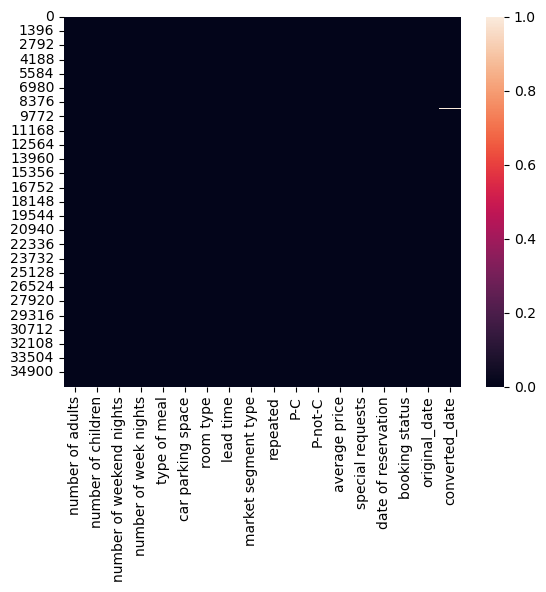

In [20]:
# Visually confirming 
sns.heatmap(df.isnull())

##### *INSIGHT: Further confrimation of missing values in the column: 'converted date' 

In [21]:
# Handling the missing values

df['converted_date']= df['converted_date'].fillna(df['converted_date'].median())

In [22]:
df.isnull().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
original_date               0
converted_date              0
dtype: int64

<Axes: >

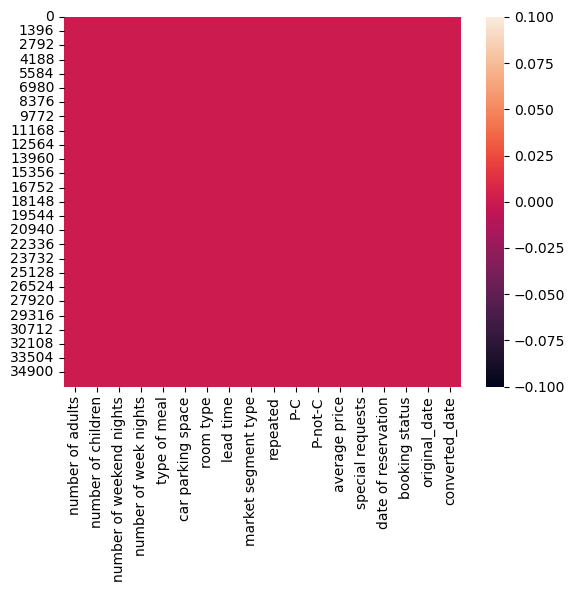

In [23]:
sns.heatmap(df.isnull())

##### *INSIGHT: Missing values in the column have been successively handled

#### DESCRIPTIVE STATISTICS

In [24]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,converted_date
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733,2018-05-24 15:55:28.548987392
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-10-02 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262,NaN


#### *INSIGHT: The unequal mean and median values in the various columns are pointers indicating the presence of outliers

#### Investigating outliers

In [26]:
numerical_cols = df.select_dtypes(include='number')
len(numerical_cols.columns)

11

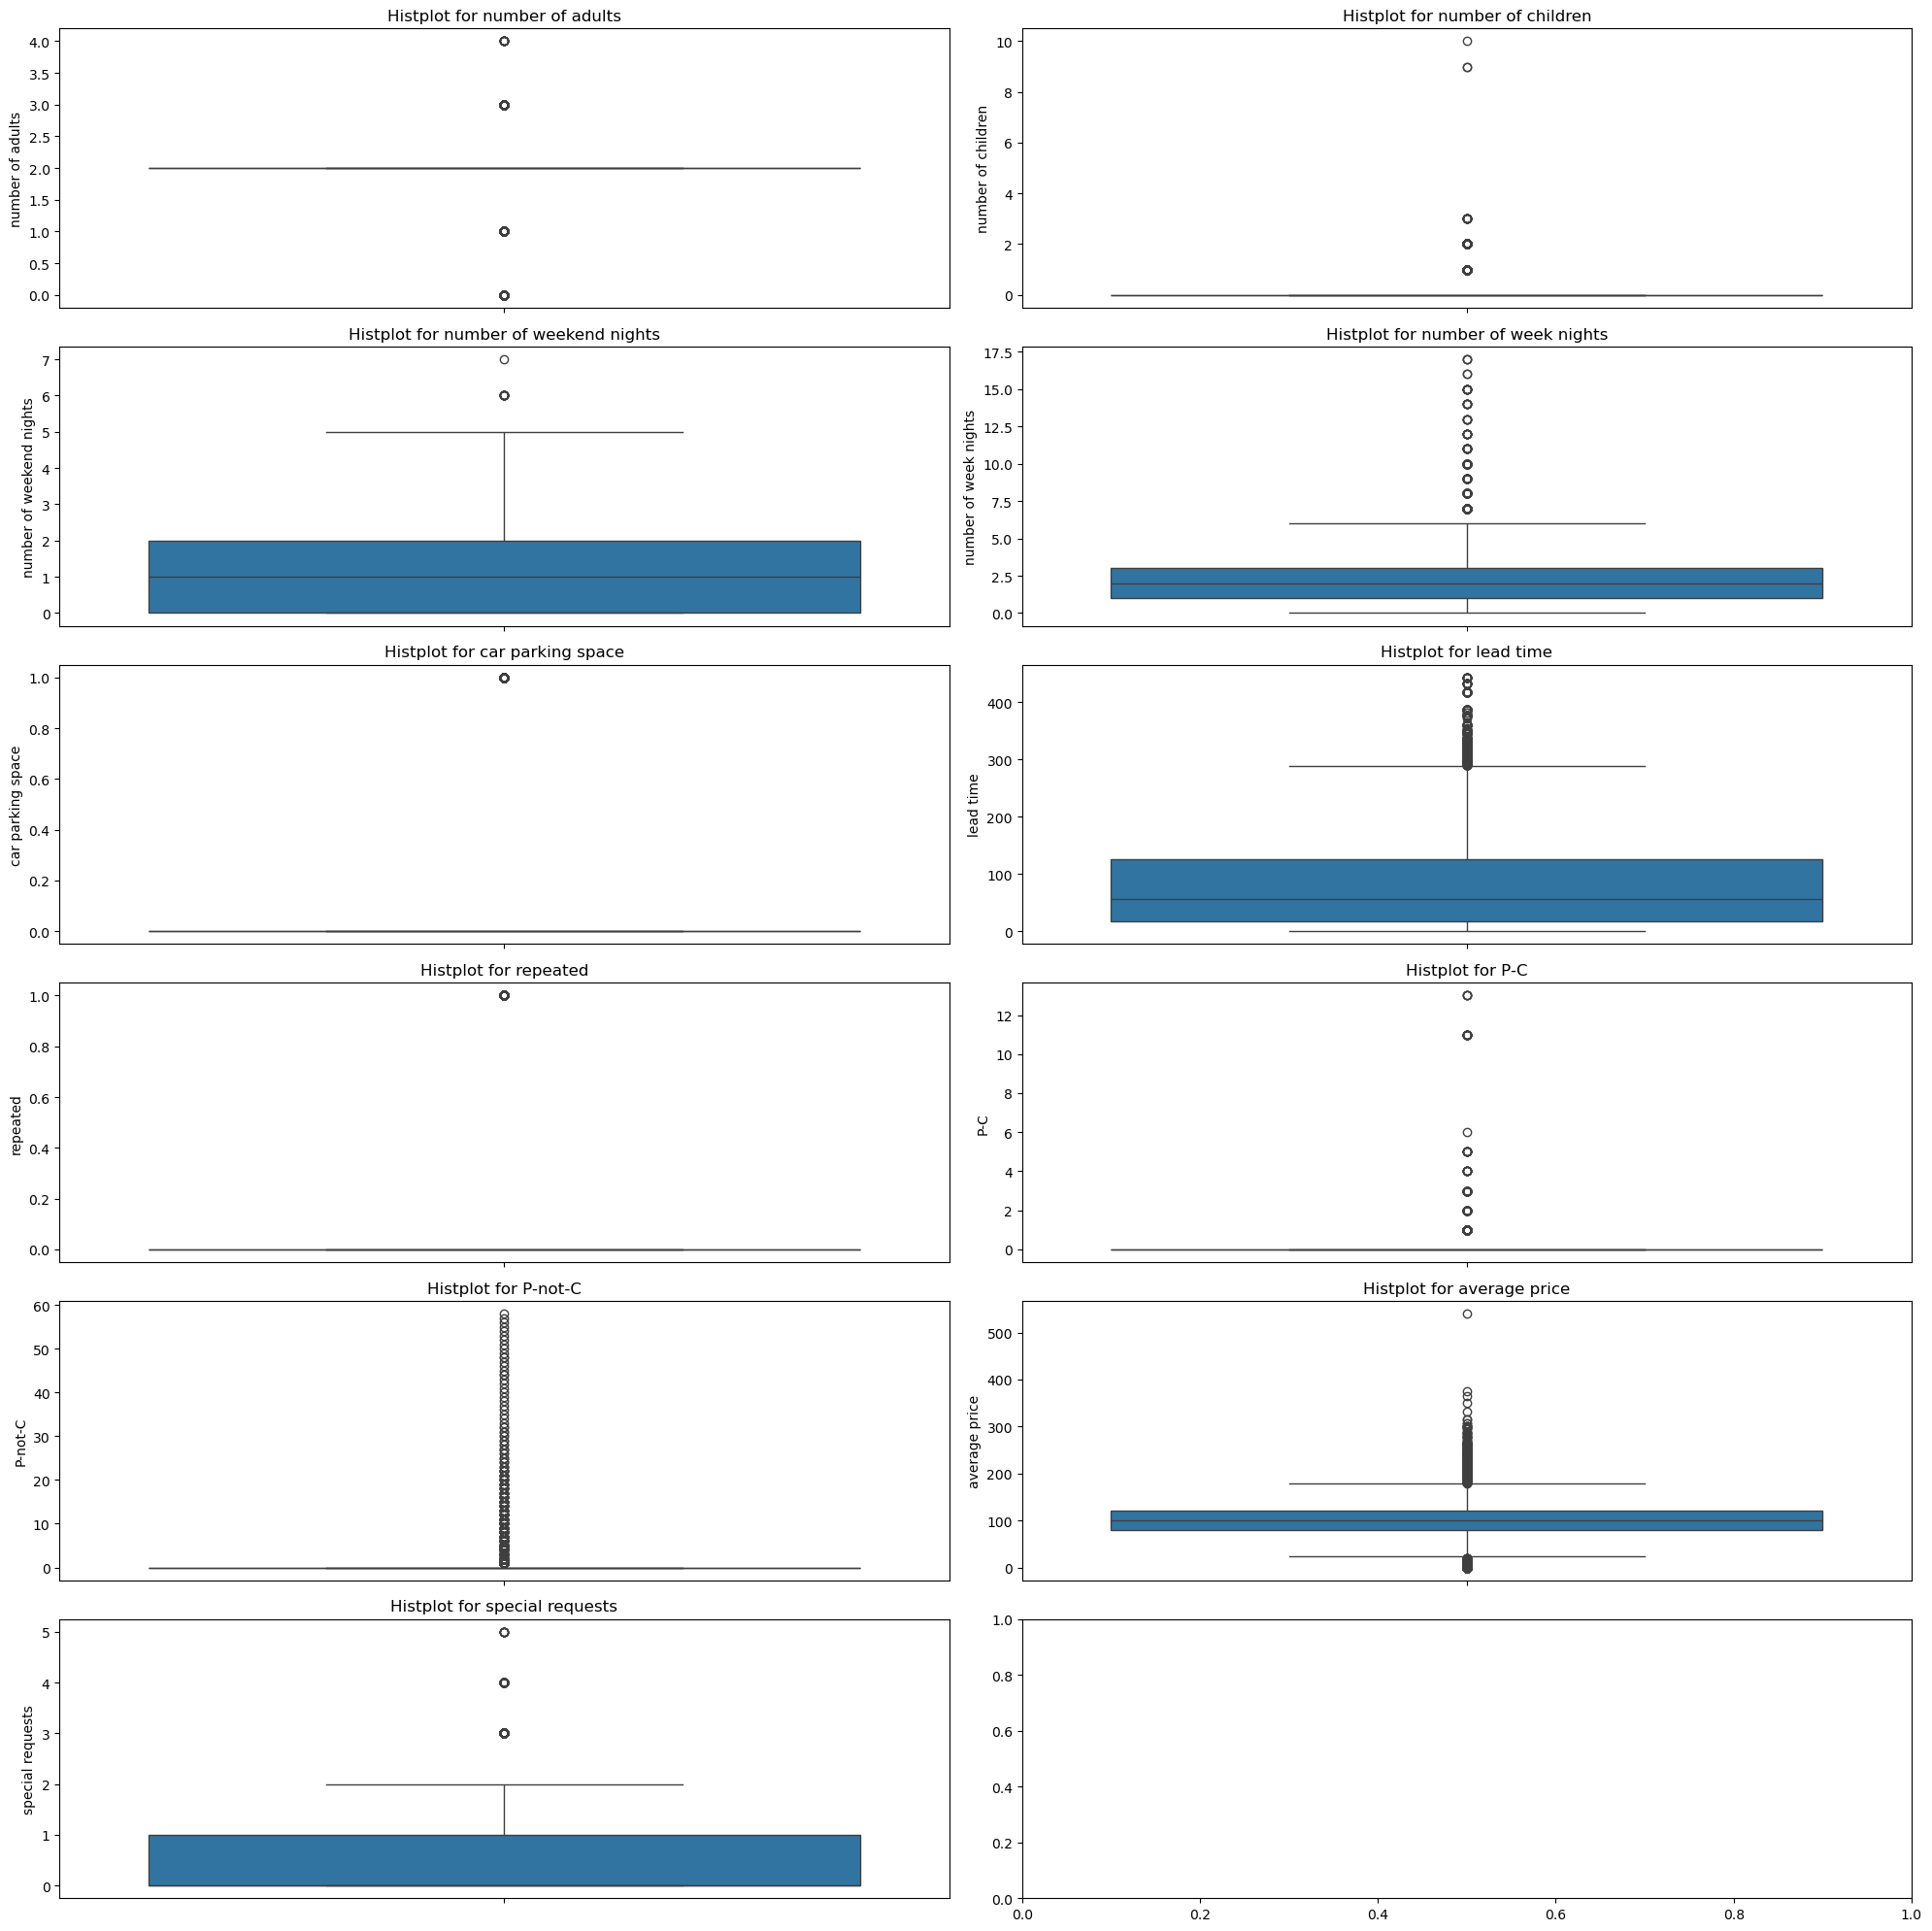

In [27]:
numerical_cols = df.select_dtypes(include='number')

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(20, 20))
ax=ax.flatten()

for idx, col in enumerate (numerical_cols):
    sns.boxplot(df[col], ax=ax[idx])
    ax[idx].set_title(f"Histplot for {col}")

plt.tight_layout()
plt.show()

##### *INSIGHT: There are outliers spotted in numerical columns and hence need to be tended to

In [28]:
print(df.columns.tolist())

['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'date of reservation', 'booking status', 'original_date', 'converted_date']


In [29]:
df['special requests'].value_counts()   

special requests
0    19780
1    11379
2     4364
3      676
4       78
5        8
Name: count, dtype: int64

##### *INSIGHT: Confirms this coulmn is a categorigal column rather than an integer data type

#### Handling Outliers

In [30]:
affected_cols= ['number of adults', 'number of children', 'number of weekend nights', 
                'number of week nights', 'average price', 'lead time'] 

In [31]:
q1 = df[affected_cols].quantile(0.25)
q3 = df[affected_cols].quantile(0.75)

In [32]:
iqr= q3 - q1

In [33]:
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)

In [34]:
df[affected_cols] = df[affected_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

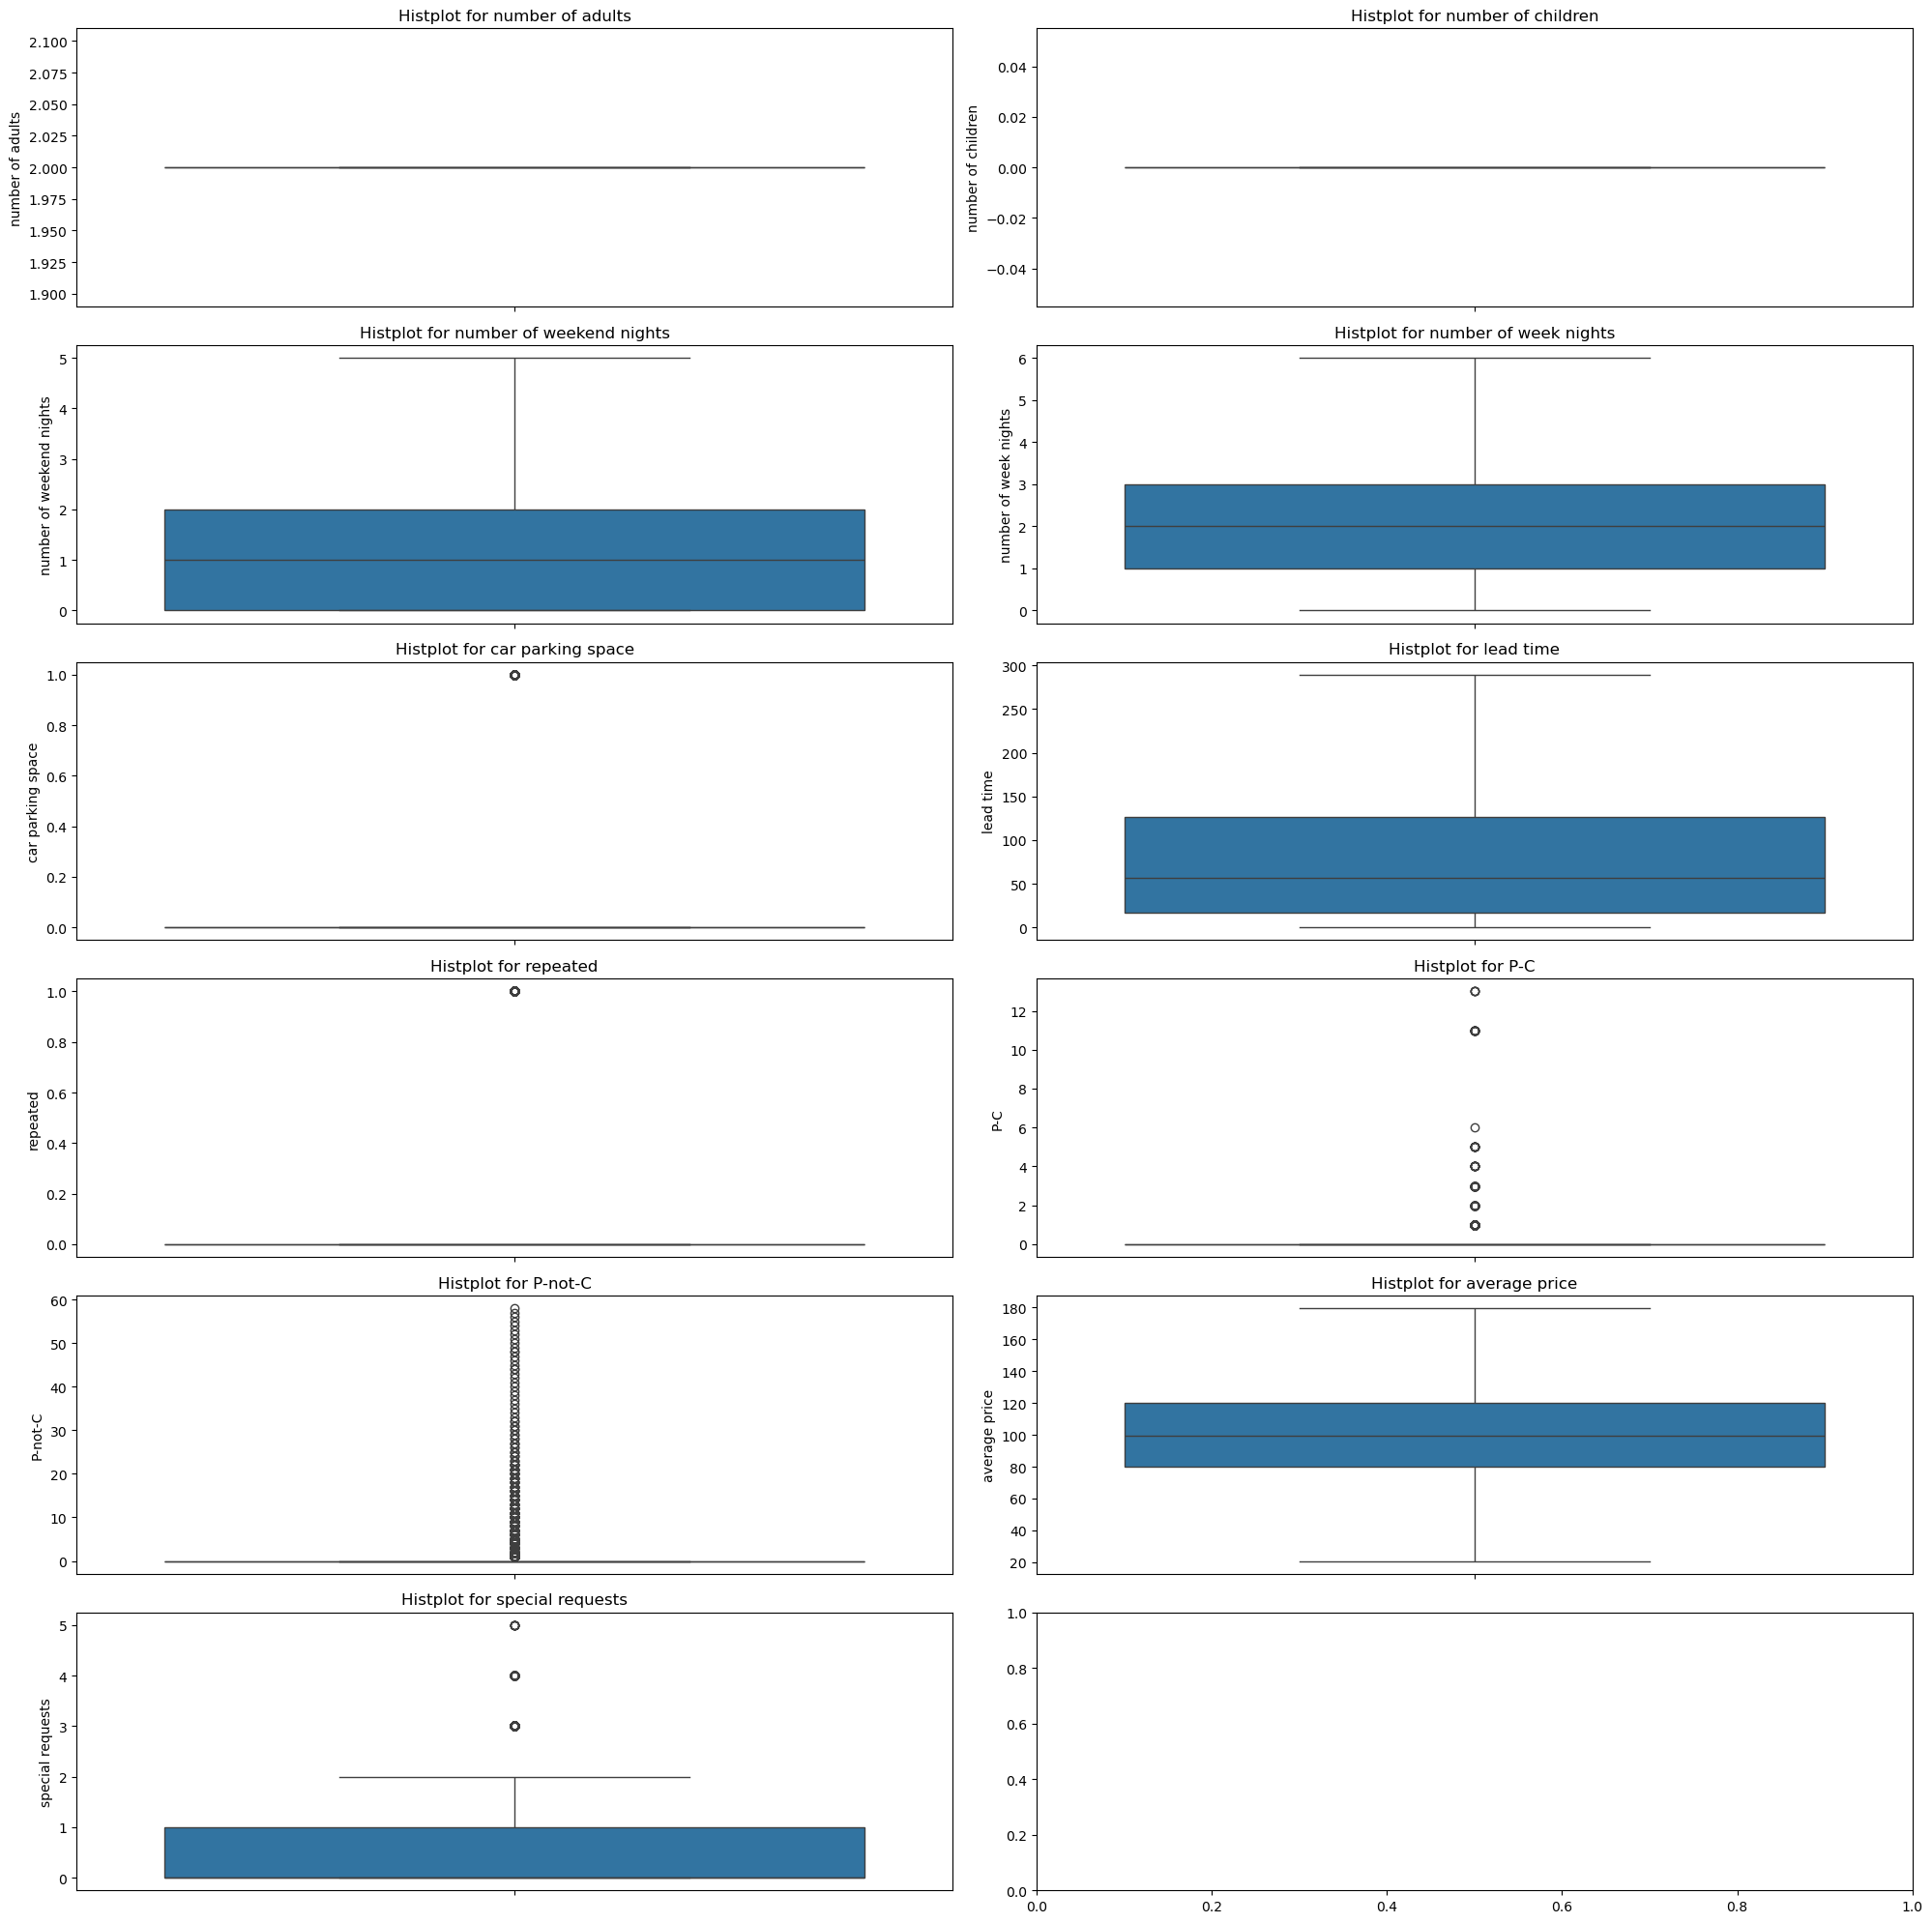

In [35]:
# Verifying 

numerical_cols = df.select_dtypes(include='number')

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(20, 20))
ax=ax.flatten()

for idx, col in enumerate (numerical_cols):
    sns.boxplot(df[col], ax=ax[idx])
    ax[idx].set_title(f"Histplot for {col}")

plt.tight_layout()
plt.show()

##### *INSIGHT: There are no more outliers in the numerical columns, those showing outliers are columns with Binary data types hence safe to ignore

### DRAWING INSIGHTS 
#### by using the data set with name df_raw

In [106]:
df_raw = pd.read_csv(r"C:\Users\TRIPLE D.TECH\Downloads\Machine Learning capstone\booking.csv")

In [108]:
df_raw.head(2)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled


In [109]:
# creating a copy of the column

df_raw['original_date'] = df_raw['date of reservation'].astype(str)
df_raw.head(2)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,original_date
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled,10/2/2015
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled,11/6/2018


In [110]:
# Step 2: Converting to pandas format

df_raw['converted_date'] = pd.to_datetime(df_raw['original_date'], errors='coerce')
df_raw.head(2)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,original_date,converted_date
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled,10/2/2015,2015-10-02
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled,11/6/2018,2018-11-06


In [111]:
df_raw.drop('Booking_ID', axis=1, inplace=True)

In [112]:
df_raw['converted_date']= df_raw['converted_date'].fillna(df_raw['converted_date'].median())

In [113]:
df_raw.isnull().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
original_date               0
converted_date              0
dtype: int64

#### ALL cleaned for analysis

In [114]:
# Handling outliers
numerical_cols_raw = df_raw.select_dtypes(include='number')
len(numerical_cols_raw.columns)

11

In [115]:
affected_cols_raw= ['number of adults', 'number of children', 'number of weekend nights', 
                'number of week nights', 'average price', 'lead time'] 

In [116]:
q1_raw = df_raw[affected_cols_raw].quantile(0.25)
q3_raw = df_raw[affected_cols_raw].quantile(0.75)

In [117]:
iqr_raw= q3_raw - q1_raw

In [118]:
lower_bound_raw = q1_raw - (1.5*iqr_raw)
upper_bound_raw = q3_raw + (1.5*iqr_raw)

In [119]:
df_raw[affected_cols_raw] = df_raw[affected_cols_raw].clip(lower=lower_bound_raw, upper=upper_bound_raw, axis=1)

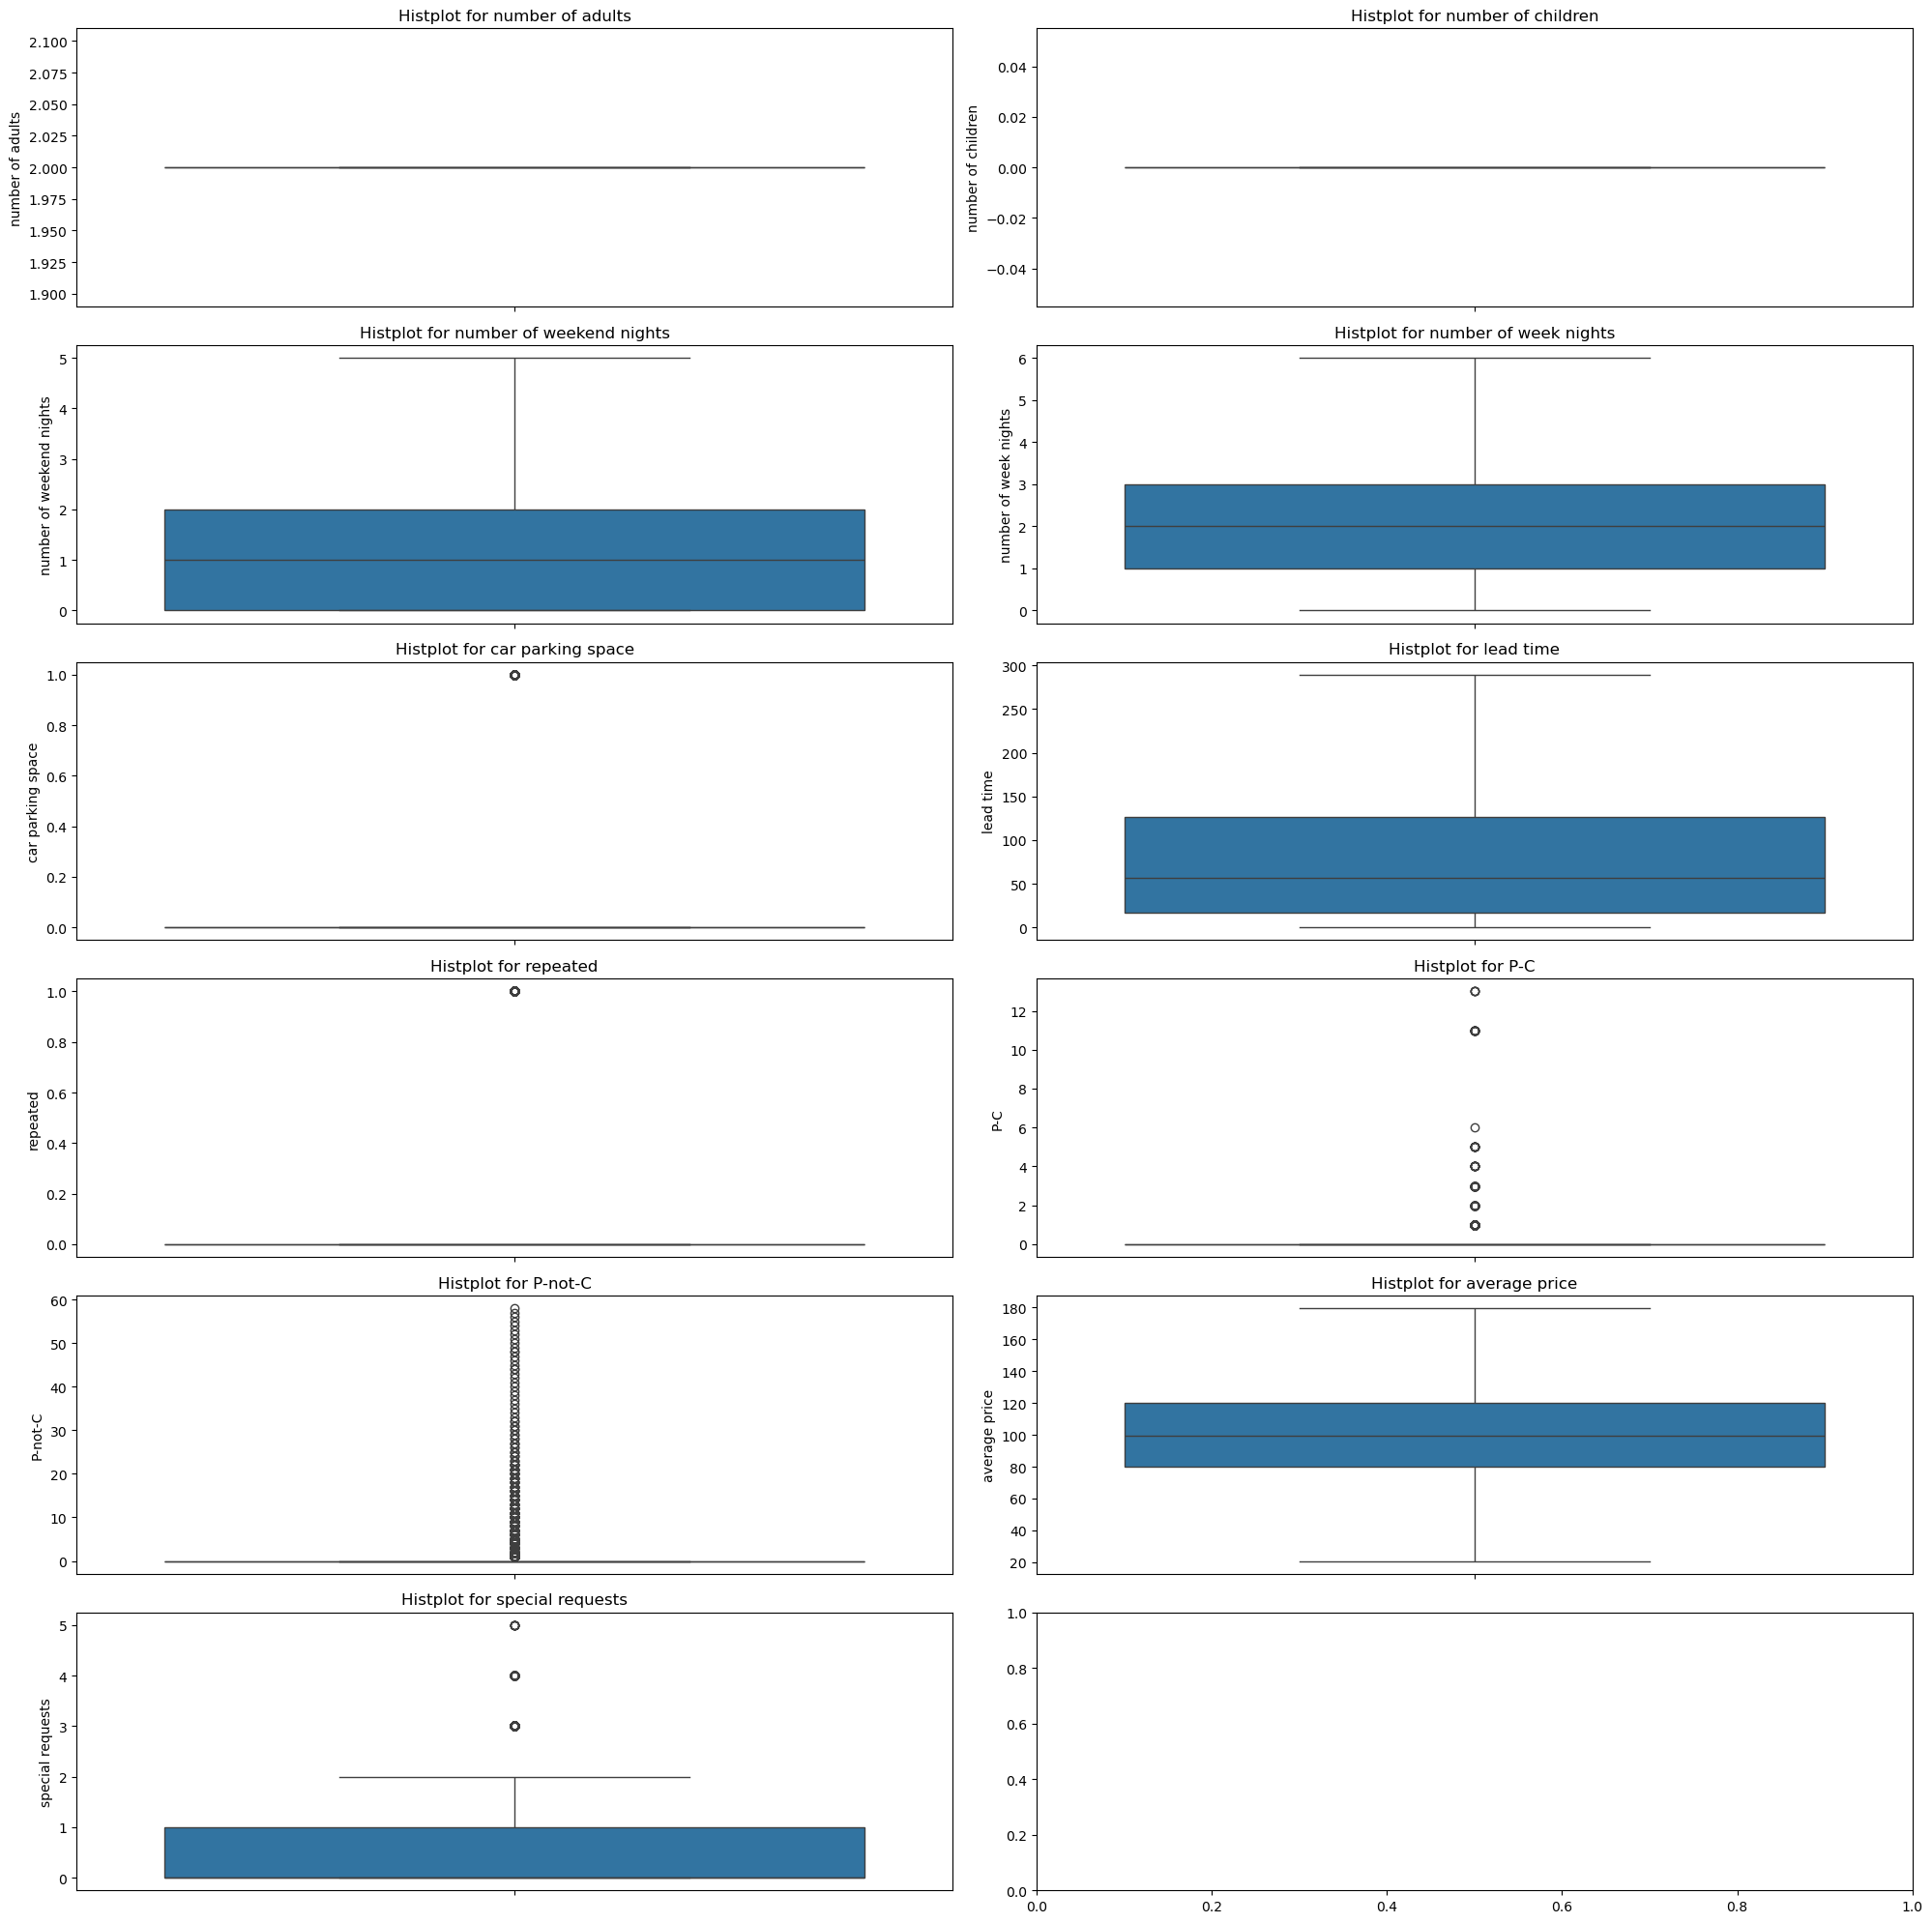

In [120]:
# Verifying 

numerical_cols_raw = df_raw.select_dtypes(include='number')

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(20, 20))
ax=ax.flatten()

for idx, col in enumerate (numerical_cols_raw):
    sns.boxplot(df_raw[col], ax=ax[idx])
    ax[idx].set_title(f"Histplot for {col}")

plt.tight_layout()
plt.show()

##### All good now for data (df_raw)!

In [122]:
df_raw.head(2)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,original_date,converted_date
0,2,0,2,5,Meal Plan 1,0,Room_Type 1,224.0,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled,10/2/2015,2015-10-02
1,2,0,1,3,Not Selected,0,Room_Type 1,5.0,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled,11/6/2018,2018-11-06


#### Looking for any patterns between average price and booking status

In [193]:
df_raw.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,converted_date,year,day_of_week
count,36285.0,36285.0,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285,36285.000000,36285.000000
mean,2.0,0.0,0.810087,2.178145,0.030977,83.767893,0.025630,0.023343,0.153369,102.968399,0.619733,2018-05-24 15:55:28.548987392,2017.820284,3.078600
min,2.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.750000,0.000000,2015-10-02 00:00:00,2015.000000,0.000000
25%,2.0,0.0,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00,2018.000000,1.000000
50%,2.0,0.0,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00,2018.000000,3.000000
75%,2.0,0.0,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00,2018.000000,5.000000
max,2.0,0.0,5.000000,6.000000,1.000000,289.500000,1.000000,13.000000,58.000000,179.550000,5.000000,2018-12-31 00:00:00,2018.000000,6.000000
std,0.0,0.0,0.867286,1.290708,0.173258,81.662186,0.158032,0.368281,1.753931,31.678904,0.786262,NaN,0.384243,2.064965


In [192]:
df_raw[["lead time", "average price", "number of weekend nights", 'number of week nights', 'number of adults', 'number of children', 'special requests' ]].describe()


,lead time,average price,number of weekend nights,number of week nights,number of adults,number of children,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.0,36285.0,36285.000000
mean,83.767893,102.968399,0.810087,2.178145,2.0,0.0,0.619733
std,81.662186,31.678904,0.867286,1.290708,0.0,0.0,0.786262
min,0.000000,20.750000,0.000000,0.000000,2.0,0.0,0.000000
25%,17.000000,80.300000,0.000000,1.000000,2.0,0.0,0.000000
50%,57.000000,99.450000,1.000000,2.000000,2.0,0.0,0.000000
75%,126.000000,120.000000,2.000000,3.000000,2.0,0.0,1.000000
max,289.500000,179.550000,5.000000,6.000000,2.0,0.0,5.000000


In [125]:
df_raw['booking status'].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_17200\2950895628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_raw, x='booking status', y='average price', palette='Set2')


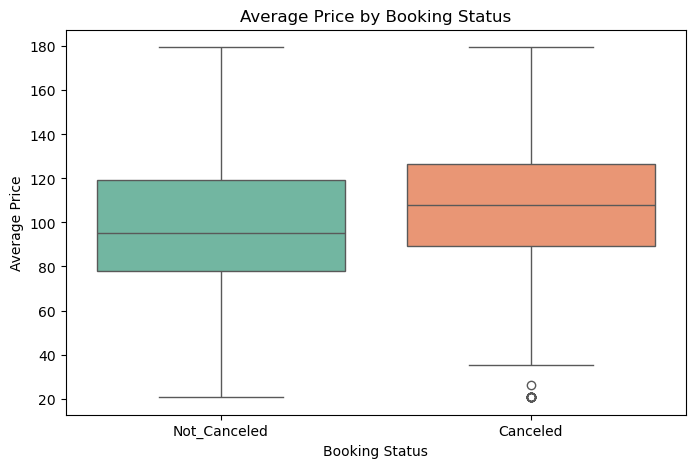

In [127]:
# using the Histogram
plt.figure(figsize=(8,5))

sns.boxplot(data=df_raw, x='booking status', y='average price', palette='Set2')
plt.title('Average Price by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Average Price')
plt.show()

#### *INSIGHT: This shows that the cancelled booking status has a higher median than the not cancelled status. This shows a relationship between booking status and average price, in that most customers tend to cancel bookings when prices were higher and they retained bookings when prices were low.  
#### *The bookings with a cancelled status happened when the median price of  were higher. within the average price of 100 to 120, and the records with no cancelling were around the average price of 80 to 120.

C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_17200\3850046285.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_raw, x='booking status', y='average price', palette='Set3')


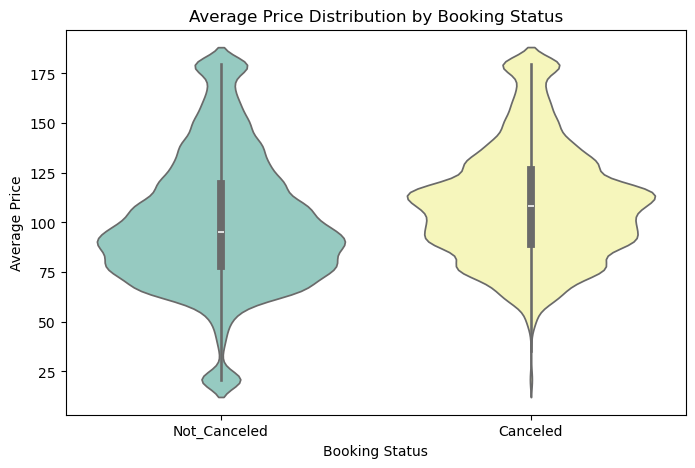

In [129]:
# Visualizing using the violin plot

plt.figure(figsize=(8,5))

sns.violinplot(data=df_raw, x='booking status', y='average price', palette='Set3')
plt.title('Average Price Distribution by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Average Price')
plt.show()

#### *INSIGHT: For the "Not cancelled Status": there is large concentration of people not cancelling around the average price ranges of 75 to 100. Thus majority of customers do not cancel when the price range falls within this range. Also, a relatively few customers do not cancel around the high prices 175.

#### * for the "cancelled status" : the violin plot reveals that most customers cancelling fall around the price range of 100 and 125. Its median price for cancelling higher than that of the "not cancelled status". And also further shows that there are some customers also cancelling at the very high prices as wel i.e around 175.

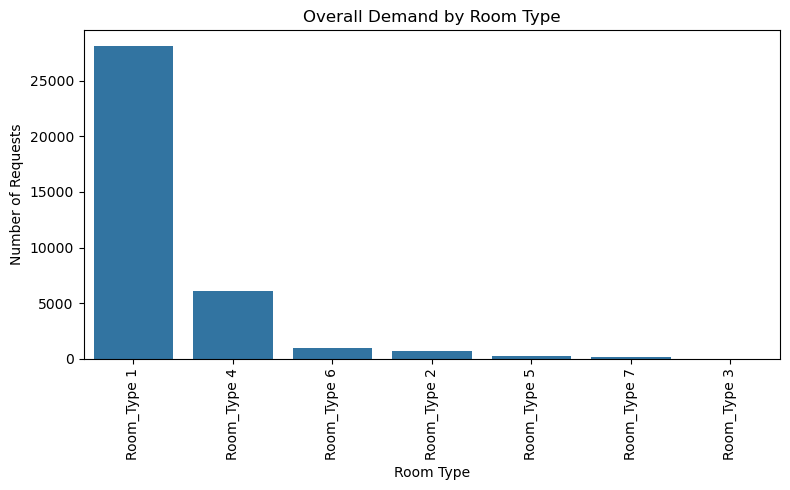

In [131]:
# Confirming the demand on the various room types
plt.figure(figsize=(8,5))

sns.countplot(data=df_raw, x='room type', order=df_raw['room type'].value_counts().index)
plt.title("Overall Demand by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Number of Requests")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### *INSIGHT: This reveals that room type 1 was most requested folowed by room type 4. room type 3 hardly had any request for it. 

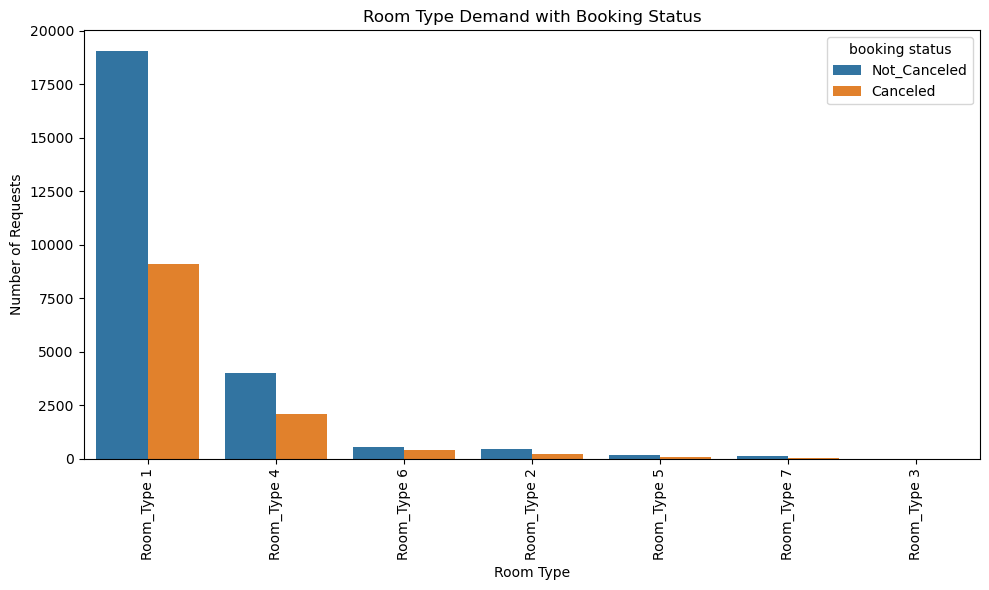

In [132]:
# Confirming the pattern between booking status and the room type

plt.figure(figsize=(10,6))

sns.countplot(data=df_raw, x='room type', hue='booking status', order=df_raw['room type'].value_counts().index)
plt.title("Room Type Demand with Booking Status")
plt.xlabel("Room Type")
plt.ylabel("Number of Requests")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### * INSIGHT: This reveals that room type 1 had the most demand and the most retained booking.

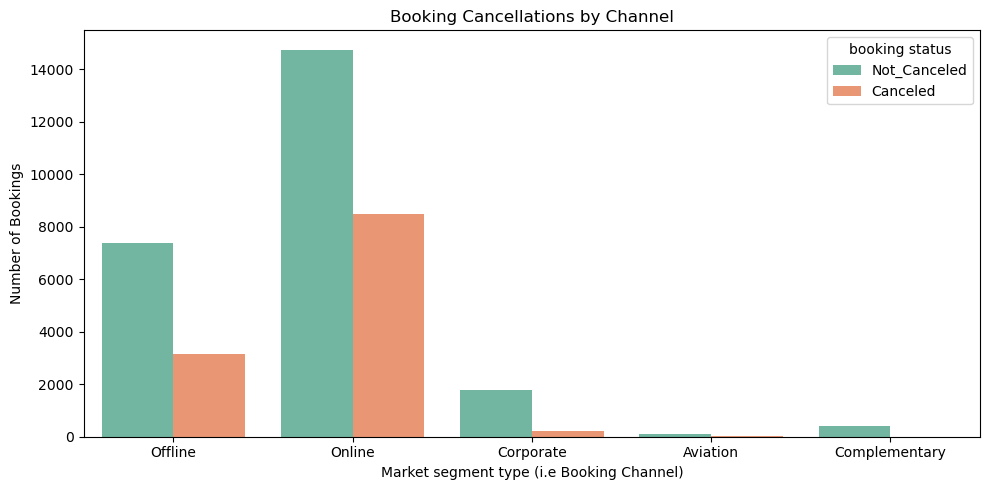

In [135]:
# Confirming which market segment type had the most booking 
plt.figure(figsize=(10,5))

sns.countplot(data=df_raw, x="market segment type", hue="booking status", palette="Set2")
plt.title("Booking Cancellations by Channel")
plt.xlabel("Market segment type (i.e Booking Channel)")
plt.ylabel("Number of Bookings")

plt.tight_layout()
plt.show()

#### INSIGHT: The online channel was the most used for booking with the highest "not cancelled booking"

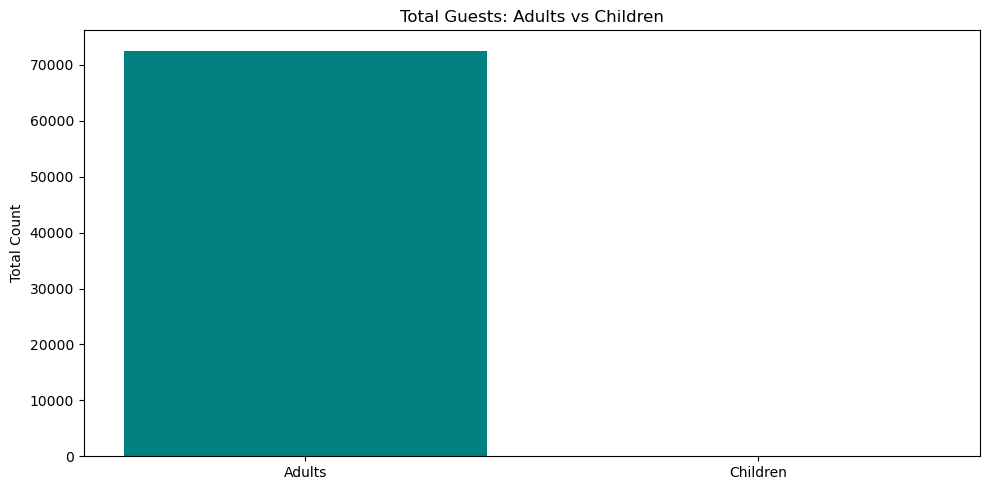

In [136]:
# Getting an overview of the customer segment (i.e comparison of children and adults)
plt.figure(figsize=(10,5))

totals = {
    "Adults": df_raw["number of adults"].sum(),
    "Children": df_raw["number of children"].sum()
        }

# Bar plot
plt.bar(totals.keys(), totals.values(), color='teal')
plt.title("Total Guests: Adults vs Children")
plt.ylabel("Total Count")

plt.tight_layout()
plt.show()

#### *INSIGHT: Reveals that our customer segment are only adults and no children have been recorded to be in the facility.

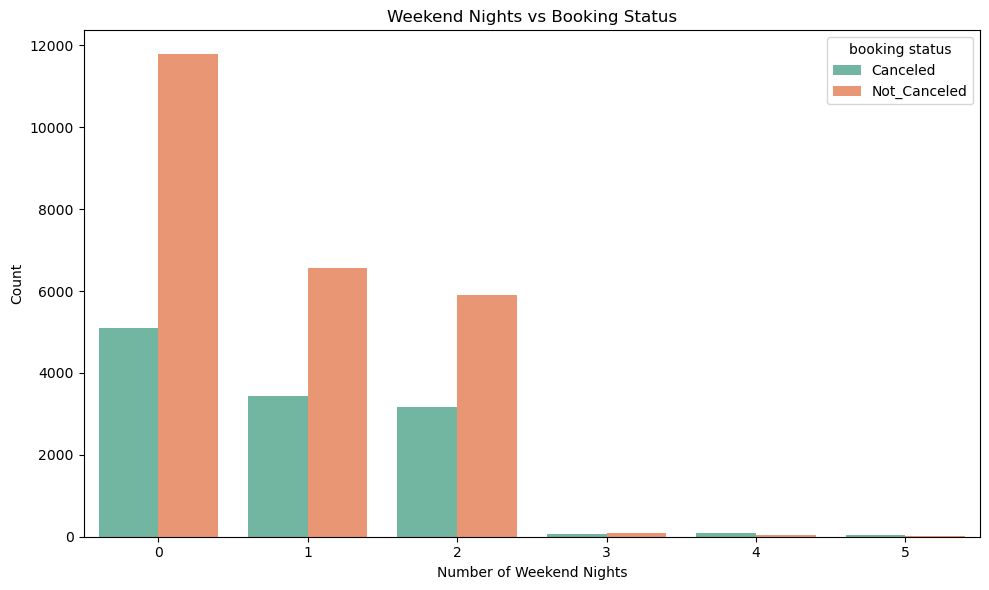

In [139]:
# visualizing the booking pattern during weekend nights

plt.figure(figsize=(10,6))

sns.countplot(data=df_raw, x="number of weekend nights", hue="booking status", palette="Set2")

plt.title("Weekend Nights vs Booking Status")
plt.xlabel("Number of Weekend Nights")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

#### INSIGHT: more customers who book 1 or 2 weekend nights tend to retain their booking compared to those who who cancel. 

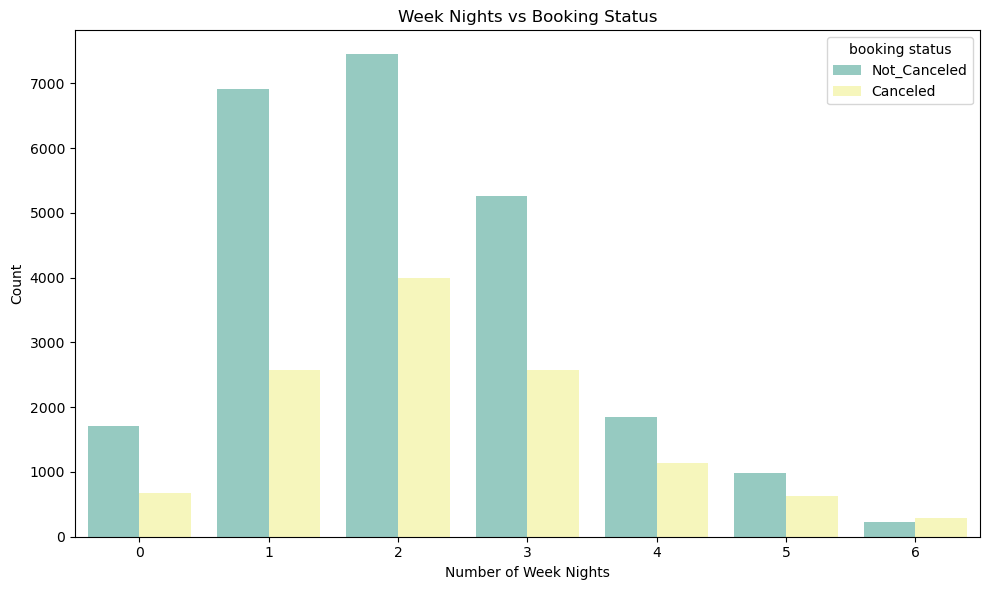

In [143]:
# verifying the booking pattern for week nights

plt.figure(figsize=(10,6))

sns.countplot(data=df_raw, x="number of week nights", hue="booking status", palette="Set3")

plt.title("Week Nights vs Booking Status")
plt.xlabel("Number of Week Nights")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

#### *INSIGHT: Majority of customers booking 1 to 3 week nights have a higher rate of retaintion compared to those cancelling. 

In [145]:
df_raw['year'] = df_raw['converted_date'].dt.year
df_raw['month'] = df_raw['converted_date'].dt.month
df_raw['day_of_week'] = df_raw['converted_date'].dt.dayofweek

In [152]:
import calendar

In [153]:
df_raw["month"] = df_raw["month"].apply(lambda x: calendar.month_name[int(x)])


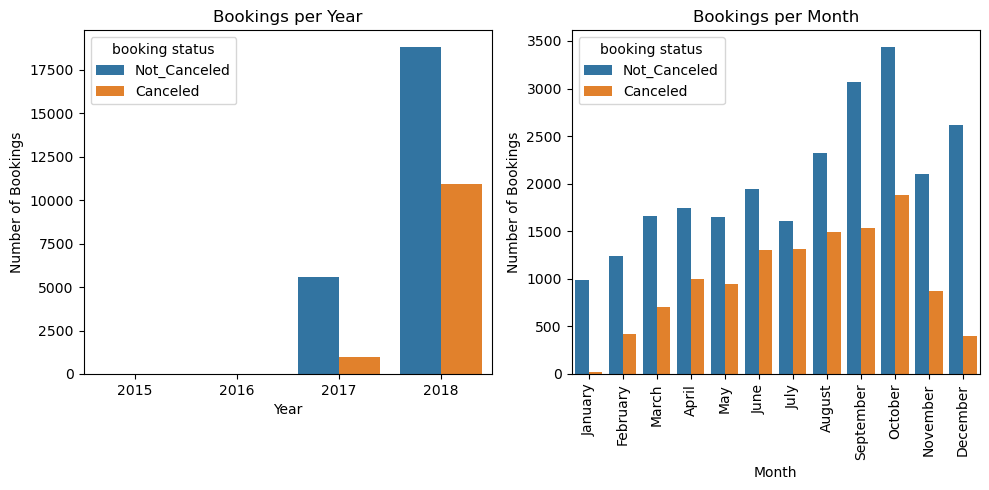

In [161]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.countplot(data=df_raw, x="year", hue="booking status", ax=axes[0])
axes[0].set_title("Bookings per Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Number of Bookings")

month_order = list(calendar.month_name[1:])  


sns.countplot(data=df_raw, x="month", order=month_order, hue="booking status", ax=axes[1])
axes[1].set_title("Bookings per Month")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Number of Bookings")
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

#### *INSIGHT: The most booking happened in the year 2018. 
#### * There seem to be peak booking around the months august to december 

In [138]:
df_raw['number of week nights'].value_counts()

number of week nights
2    11447
1     9488
3     7842
4     2992
0     2387
5     1616
6      513
Name: count, dtype: int64

In [134]:
df_raw.head(2)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,original_date,converted_date
0,2,0,2,5,Meal Plan 1,0,Room_Type 1,224.0,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled,10/2/2015,2015-10-02
1,2,0,1,3,Not Selected,0,Room_Type 1,5.0,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled,11/6/2018,2018-11-06


#### Data encoding and Scaling
1. Labeling of categorical columns: We now convert categorical columns into numeric format using the label encoder method

In [36]:
%pip install scikit-learn

  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.9 MB 1.2 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.9 MB 1.3 MB/s eta 0:00:07
   ---- ----------------------------------- 1.0/8.9 MB 1.1 MB/s eta 0:00:07
   ----- ---------------------------------- 1.3/8.9 MB 1.2 MB/s eta 0:00:07
   ------- -------------------------------- 1.6/8.9 MB 1.2 MB/s eta 0:00:07
   ------- -------------------------------- 1.6/8.9 MB 1.2 MB/s eta 0:00:07
   -------- ------------------------------- 1.8/8.9 MB 1.1 MB/s eta 0:00:07
   --------- ------------------------------ 2.1/8.9 MB 1.1 MB/s eta 0:00:07
   ----------- ---------------------------- 2.6/8.9 M

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
encoder = LabelEncoder()

In [40]:
# Noting the categorical columns (i.e columns of interest)
print(df.columns.tolist())

['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'date of reservation', 'booking status', 'original_date', 'converted_date']


In [41]:
df['type of meal']= encoder.fit_transform(df['type of meal'])
df['room type']= encoder.fit_transform(df['room type'])   
df['market segment type']= encoder.fit_transform(df['market segment type'])   
df['booking status']= encoder.fit_transform(df['booking status'])  

In [42]:
# Confirming this
df.head(2)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,original_date,converted_date
0,2,0,2,5,0,0,0,224.0,3,0,0,0,88.00,0,10/2/2015,1,10/2/2015,2015-10-02
1,2,0,1,3,3,0,0,5.0,4,0,0,0,106.68,1,11/6/2018,1,11/6/2018,2018-11-06


##### *The categorical columns have been successively encoded using the Label Encoder.

#### 2. Scaling numerical columns now (i.e bringing them to a similar range to improve model performance)

In [43]:
df.head(2)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,original_date,converted_date
0,2,0,2,5,0,0,0,224.0,3,0,0,0,88.00,0,10/2/2015,1,10/2/2015,2015-10-02
1,2,0,1,3,3,0,0,5.0,4,0,0,0,106.68,1,11/6/2018,1,11/6/2018,2018-11-06


In [46]:
# We first extract the various components of our date time column
df['year'] = df['converted_date'].dt.year
df['month'] = df['converted_date'].dt.month
df['day_of_week'] = df['converted_date'].dt.dayofweek

In [45]:
df.head(2)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,...,P-not-C,average price,special requests,date of reservation,booking status,original_date,converted_date,year,month,day_of_week
0,2,0,2,5,0,0,0,224.0,3,0,...,0,88.00,0,10/2/2015,1,10/2/2015,2015-10-02,2015,10,4
1,2,0,1,3,3,0,0,5.0,4,0,...,0,106.68,1,11/6/2018,1,11/6/2018,2018-11-06,2018,11,1


In [47]:
print(df.columns.tolist())

['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'date of reservation', 'booking status', 'original_date', 'converted_date', 'year', 'month', 'day_of_week']


In [48]:
cols_to_scale = ['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'lead time', 'average price', 'year', 'month', 'day_of_week']

#### Confirming the data distribution and which scaler to use

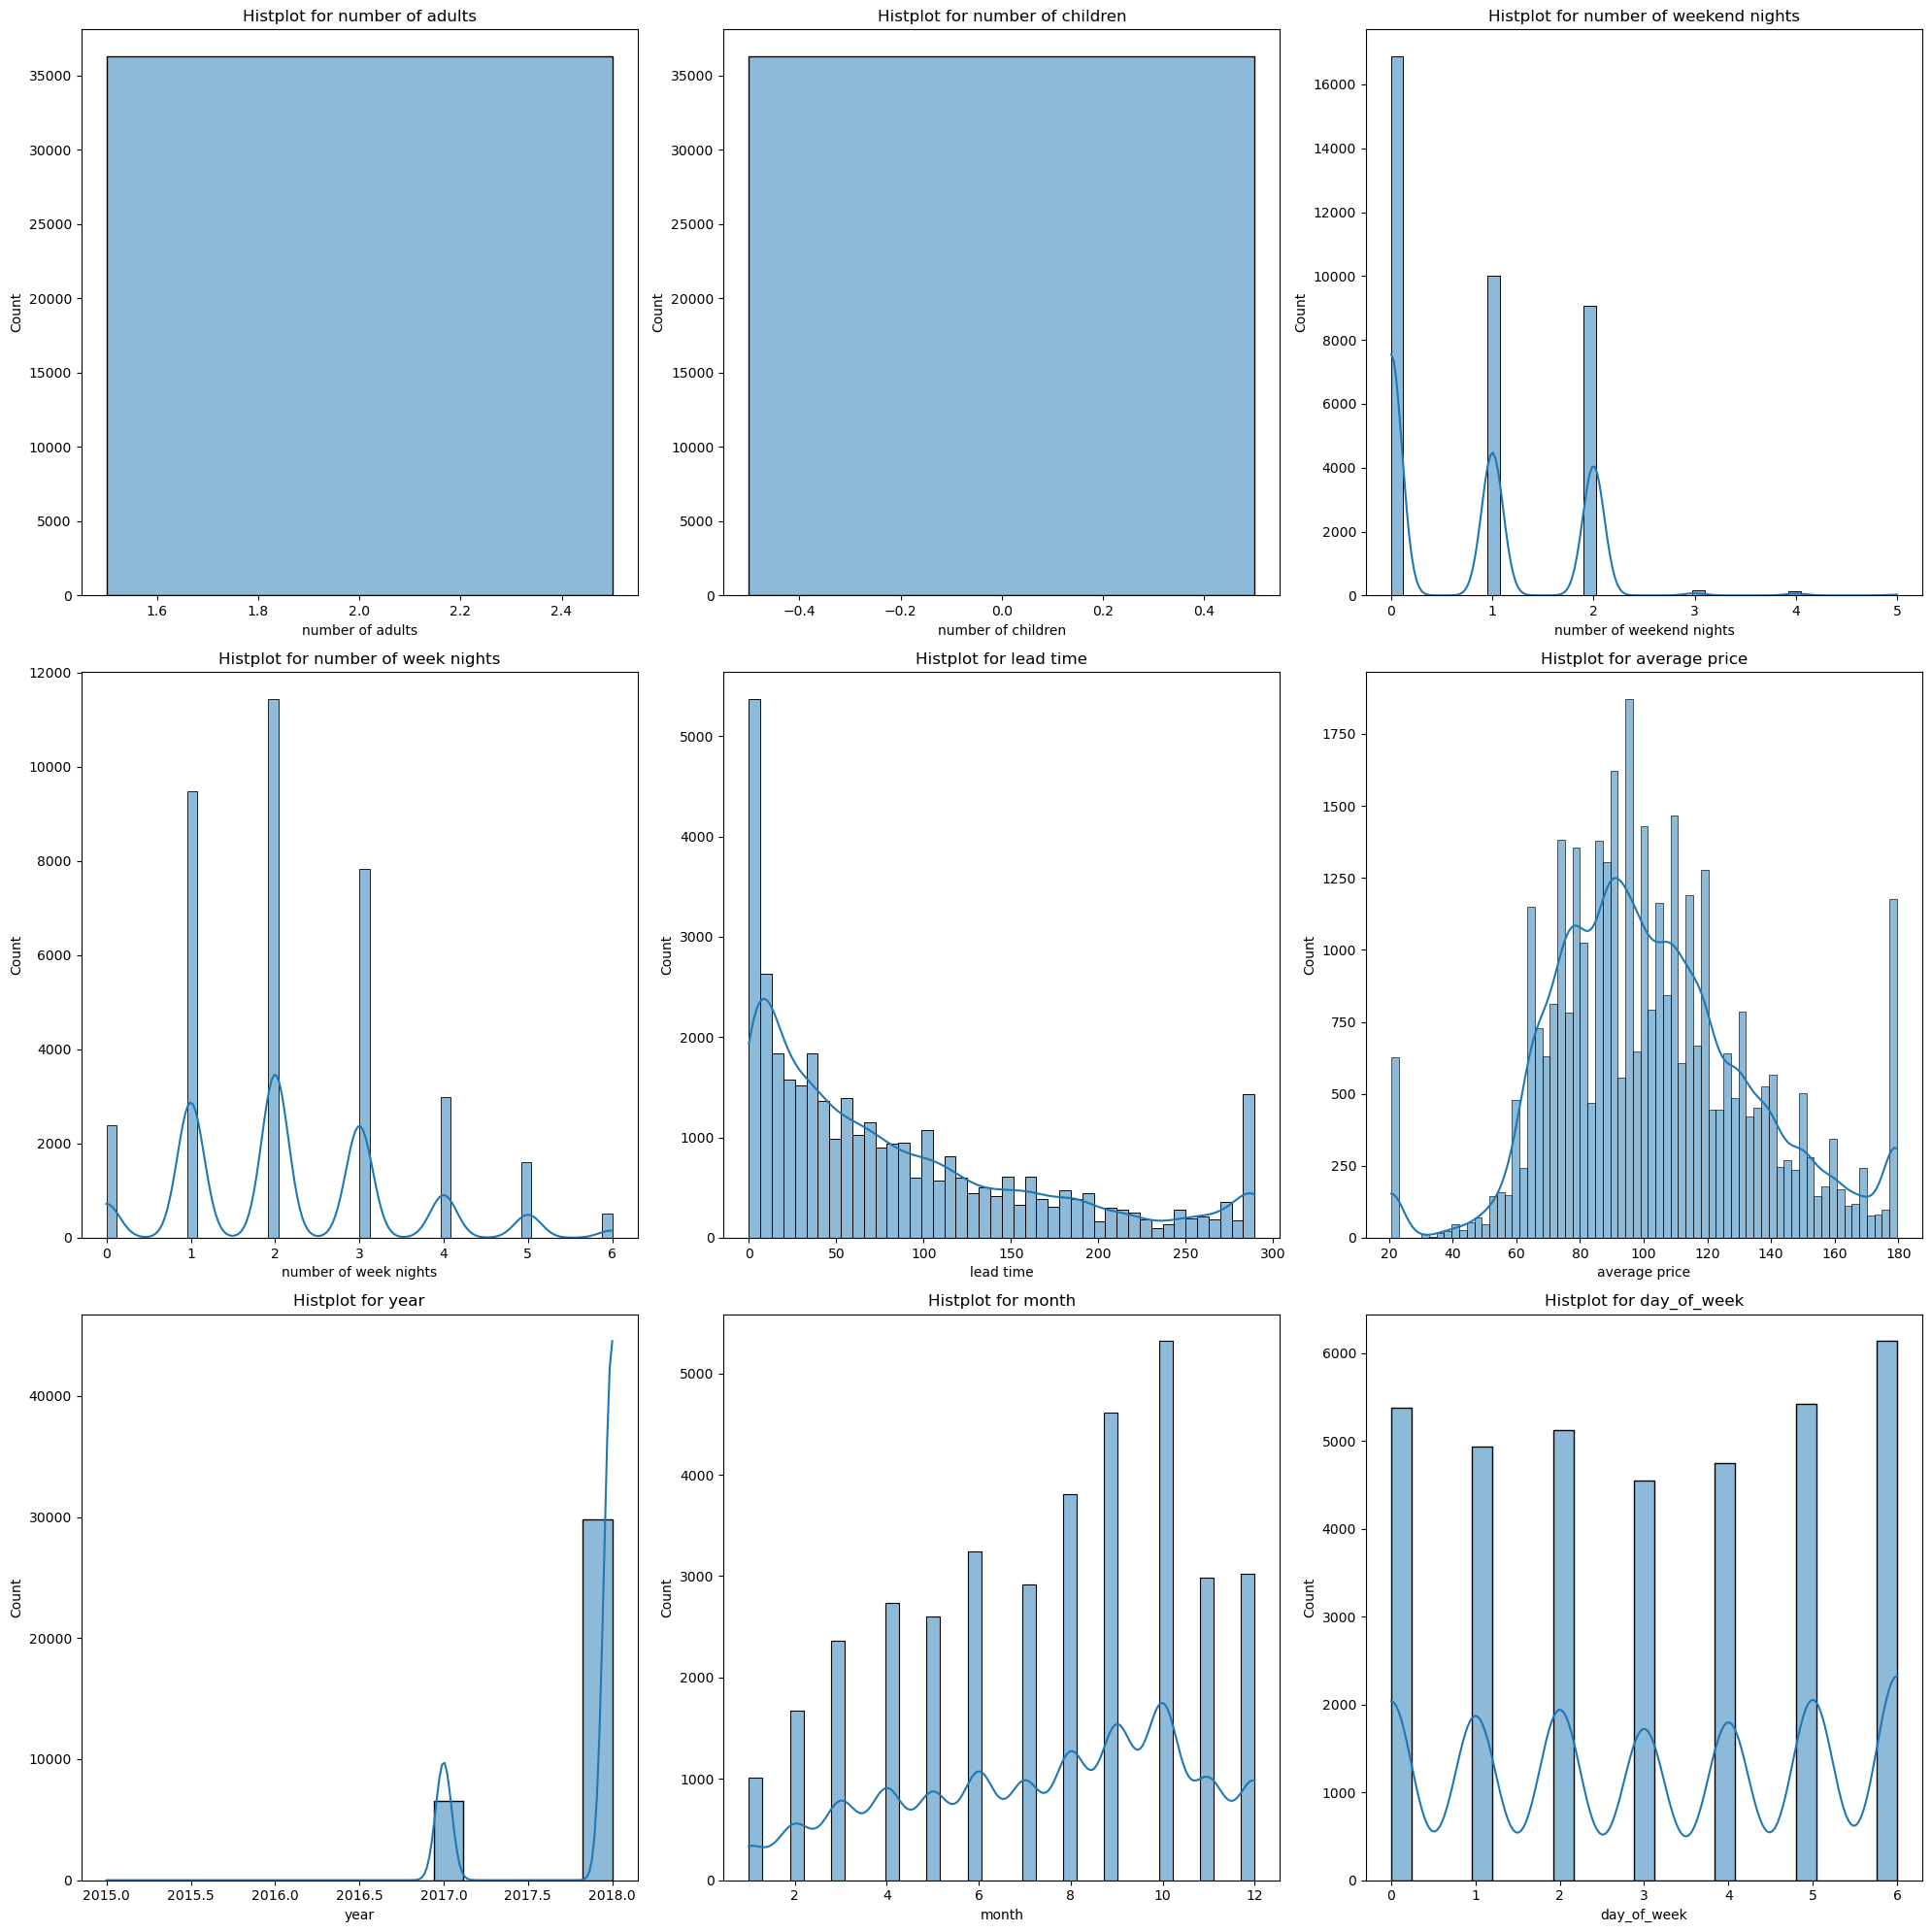

In [49]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
ax=ax.flatten()

for idx, col in enumerate(cols_to_scale):
    sns.histplot(df[col], ax=ax[idx], kde=True )
    ax[idx].set_title(f"Histplot for {col}")

plt.tight_layout()
plt.show()

##### *INSIGHT: Since most of the plots are normally distributed or slightly skewed, we import the Standard Scaler for scaling purpose.

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [55]:
# Confirming
df.head(2)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,...,P-not-C,average price,special requests,date of reservation,booking status,original_date,converted_date,year,month,day_of_week
0,0.0,0.0,1.372015,2.186315,0,0,0,1.717246,3,0,...,0,-0.472510,0,10/2/2015,1,10/2/2015,2015-10-02,-7.339943,0.839095,0.446212
1,0.0,0.0,0.218977,0.636756,3,0,0,-0.964571,4,0,...,0,0.117165,1,11/6/2018,1,11/6/2018,2018-11-06,0.467721,1.165323,-1.006617


##### * Our numerical columns have been successively scaled and fit for use in our machine leanring model

#### Handling imbalance in our target variable (i.e booking status)


In [56]:
# Getting an overview of the imbalance in the target variable

df['booking status'].value_counts()

booking status
1    24396
0    11889
Name: count, dtype: int64

In [57]:
df['booking status'].value_counts(normalize=True)*100

booking status
1    67.234394
0    32.765606
Name: proportion, dtype: float64

<Axes: xlabel='booking status', ylabel='count'>

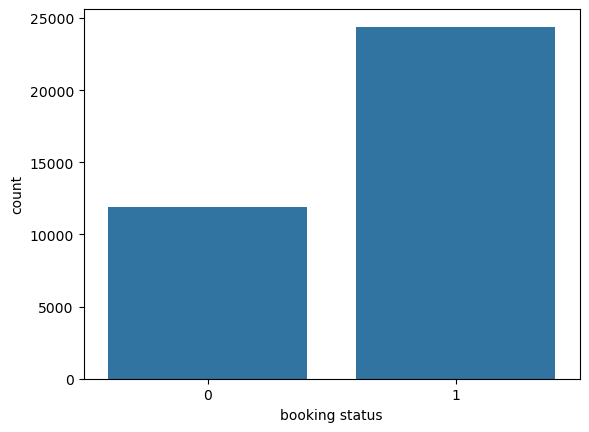

In [58]:
# visualizing the imbalance in our target variable

sns.countplot(x=df['booking status'])

##### *INSIGHT: There is a significant imbalance in our target variable, hence need to handle that 

In [59]:
%pip install --upgrade scikit-learn imbalanced-learn

  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)
Note: you may need to restart the kernel to use updated packages.


In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
# Lets drop date columns (i.e  date of reservation, original_date)
df.drop(['date of reservation', 'original_date'], axis=1, inplace=True)

In [62]:
x= df.drop(['booking status', 'converted_date'], axis=1)
y= df['booking status']

In [63]:
y.head(2)

0    1
1    1
Name: booking status, dtype: int64

In [64]:
x.head(2)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,year,month,day_of_week
0,0.0,0.0,1.372015,2.186315,0,0,0,1.717246,3,0,0,0,-0.472510,0,-7.339943,0.839095,0.446212
1,0.0,0.0,0.218977,0.636756,3,0,0,-0.964571,4,0,0,0,0.117165,1,0.467721,1.165323,-1.006617


In [65]:
smote = SMOTE(random_state=42)

In [66]:
x_resampled, y_resampled = smote.fit_resample(x,y)

In [67]:
# Checking for missing values 
x.isnull().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
year                        0
month                       0
day_of_week                 0
dtype: int64

###### *INSIGHT: There are no missing values, hence good to go

In [68]:
# Confirming if our target variable has been balanced now
y_resampled.value_counts()

booking status
1    24396
0    24396
Name: count, dtype: int64

<Axes: xlabel='booking status', ylabel='count'>

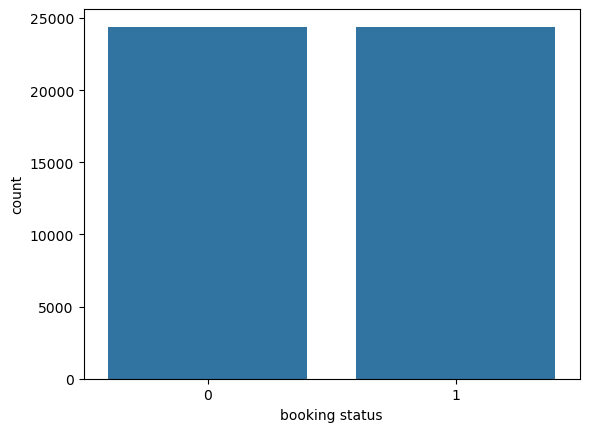

In [69]:
# Visualizing the balanced target variable now
sns.countplot(x=y_resampled)

##### *INSIGHT: Our target variable is now balanced (i.e all imbalances have been catered for)

#### Saving our resampled data set now

In [70]:
# Creating the data frame for the new data set

resampled_df = pd.DataFrame(x_resampled, columns=x.columns)
resampled_df['booking status'] = y_resampled

In [71]:
resampled_df

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,year,month,day_of_week,booking status
0,0.0,0.0,1.372015,2.186315,0,0,0,1.717246,3,0,0,0,-0.472510,0,-7.339943,0.839095,0.446212,1
1,0.0,0.0,0.218977,0.636756,3,0,0,-0.964571,4,0,0,0,0.117165,1,0.467721,1.165323,-1.006617,1
2,0.0,0.0,0.218977,0.636756,0,0,0,-1.013554,4,0,0,0,-1.672063,0,0.467721,-1.770732,-0.522341,0
3,0.0,0.0,-0.934060,-0.138023,0,0,0,1.558051,4,0,0,0,-0.093704,1,-2.134834,-0.792047,0.930489,0
4,0.0,0.0,0.218977,-0.138023,3,0,0,-0.438004,4,0,0,0,-0.819749,0,0.467721,-1.118275,-0.522341,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48787,0.0,0.0,1.372015,-0.138023,0,0,0,-0.230792,3,0,0,0,-0.794335,0,0.467721,-1.243824,-1.006617,0
48788,0.0,0.0,-0.934060,-0.138023,0,0,0,1.656017,4,0,0,0,1.270061,1,0.467721,0.512867,-0.038064,0
48789,0.0,0.0,-0.934060,2.186315,1,0,0,1.790720,3,0,0,0,1.074282,0,0.467721,0.512867,-0.038064,0
48790,0.0,0.0,-0.934060,-0.138023,0,0,0,-0.786409,2,0,0,0,-0.751868,0,0.467721,-1.444503,0.930489,0


In [72]:
# Saving our new data set (i.e resampled_df)

resampled_df.to_csv("Hotel Haven resampled data for predicting Booking status.csv", index=True)

In [73]:
y_resampled.value_counts()

booking status
1    24396
0    24396
Name: count, dtype: int64

In [74]:
resampled_df.head(2)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,year,month,day_of_week,booking status
0,0.0,0.0,1.372015,2.186315,0,0,0,1.717246,3,0,0,0,-0.472510,0,-7.339943,0.839095,0.446212,1
1,0.0,0.0,0.218977,0.636756,3,0,0,-0.964571,4,0,0,0,0.117165,1,0.467721,1.165323,-1.006617,1


##### Our resampled balanced dataframe is now with the name resampled_df

### Data Spliting 
##### (i.e spliting our cleaned data into the training sets and the testing set, ensuring our target variable is representive in both)

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [78]:
y_train

6355     0
6521     1
9288     0
22377    1
29683    1
        ..
11284    1
44732    0
38158    0
860      0
15795    1
Name: booking status, Length: 39033, dtype: int64

In [79]:
print(f"training data size {len(x_train)}")
print(f"Testing data size {len(x_test)}")

training data size 39033
Testing data size 9759


###### *INSIGHT: Data has been successively splitted into our training set and test set

## Model Selection

#### Starting with our baseline model 
1. Logistic regression Model
   

In [81]:
# Importing the model

from sklearn.linear_model import LogisticRegression

In [82]:
# Initializing the model
LGR_model = LogisticRegression(random_state=42)

In [83]:
# Training the model

LGR_model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [84]:
# Predicting on the test set

y_pred = LGR_model.predict(x_test)

#### *Getting our report on the preditions made to assess the efficiency of our Logistic Regression model

In [85]:
# Importing our metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Logistic Regression Model's classification report
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      4833
           1       0.78      0.77      0.78      4926

    accuracy                           0.78      9759
   macro avg       0.78      0.78      0.78      9759
weighted avg       0.78      0.78      0.78      9759



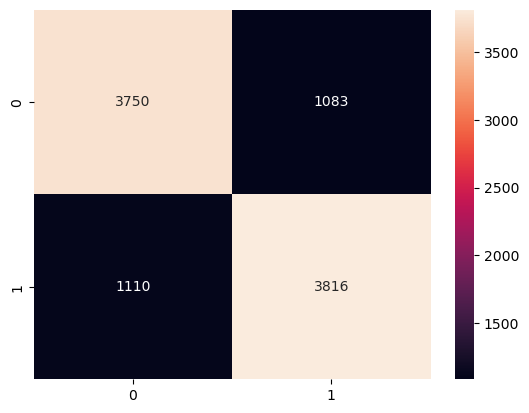

In [86]:
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)


print("Logistic Regression Model's classification report")
print(report)

sns.heatmap(matrix, annot=True, fmt="g")
plt.show()

#### *INSIGHT: This model when predicting category "0" did so accurately 3750 times and wrongly 1110 times. It also predicted category 1 accurately 3816 times but failed so 1083 times. the overall accuracy of this model is at 78%.

In [87]:
y_test.value_counts()

booking status
1    4926
0    4833
Name: count, dtype: int64

### Using a more advanced trained model for a better prediction
2. Random forest Model

In [88]:
# Import the model
from sklearn.ensemble import RandomForestClassifier 

In [89]:
# Initializing the model
RGF_model = RandomForestClassifier(random_state=42)

In [90]:
# Training the model
RGF_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [91]:
# Predicting on the test set

y_pred = RGF_model.predict(x_test)

##### *Getting our report on the preditions made to assess the efficiency of our Random Forest model

Random Forest Model's classification report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4833
           1       0.92      0.92      0.92      4926

    accuracy                           0.92      9759
   macro avg       0.92      0.92      0.92      9759
weighted avg       0.92      0.92      0.92      9759



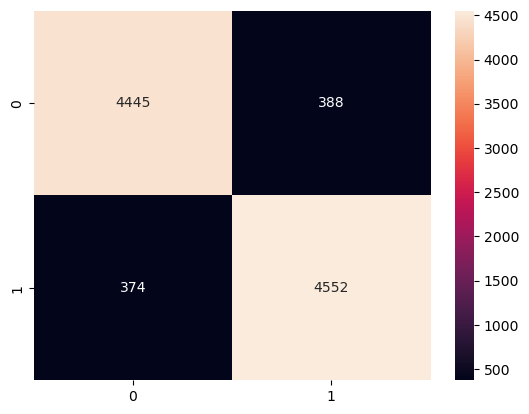

In [92]:
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)


print("Random Forest Model's classification report")
print(report)

sns.heatmap(matrix, annot=True, fmt="g")
plt.show()

##### *INSIGHT: This model has a 92% accuracy in its prediction. It predicted accrately category "0", 4445 times and inaccurately 374 times. Also, it predicted category 1 accurately 4552 times and accruately 388 times. A better performing model compared to the Logistci regression model used earlier on.

#### Trying other multiple classsification models


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

%pip install xgboost
from xgboost import XGBClassifier

  Using cached xgboost-3.0.5-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.5-py3-none-win_amd64.whl (56.8 MB)
Note: you may need to restart the kernel to use updated packages.


Training Logistic Regression...
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      4833
           1       0.78      0.77      0.78      4926

    accuracy                           0.78      9759
   macro avg       0.78      0.78      0.78      9759
weighted avg       0.78      0.78      0.78      9759



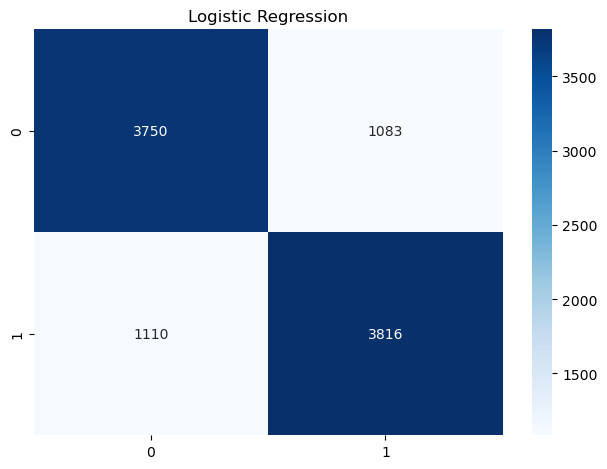

Training Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4833
           1       0.92      0.92      0.92      4926

    accuracy                           0.92      9759
   macro avg       0.92      0.92      0.92      9759
weighted avg       0.92      0.92      0.92      9759



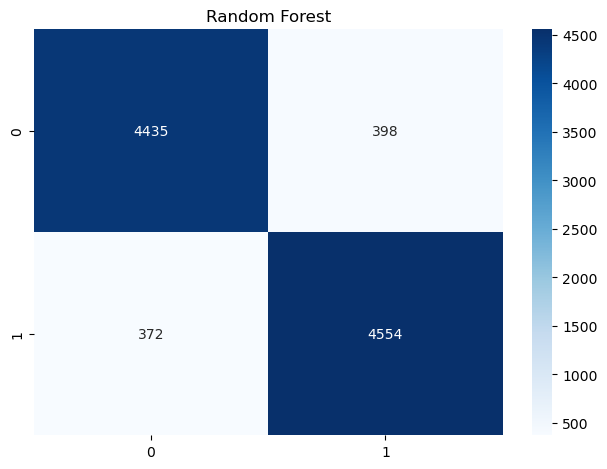

Training Gradient Boosting...
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4833
           1       0.83      0.85      0.84      4926

    accuracy                           0.83      9759
   macro avg       0.83      0.83      0.83      9759
weighted avg       0.83      0.83      0.83      9759



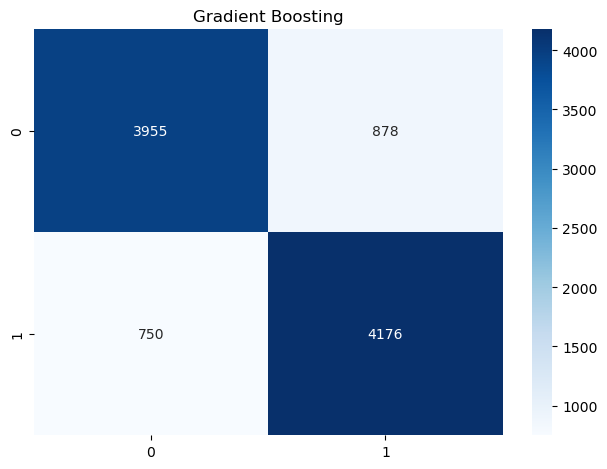

Training AdaBoost...
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      4833
           1       0.76      0.79      0.78      4926

    accuracy                           0.77      9759
   macro avg       0.77      0.77      0.77      9759
weighted avg       0.77      0.77      0.77      9759



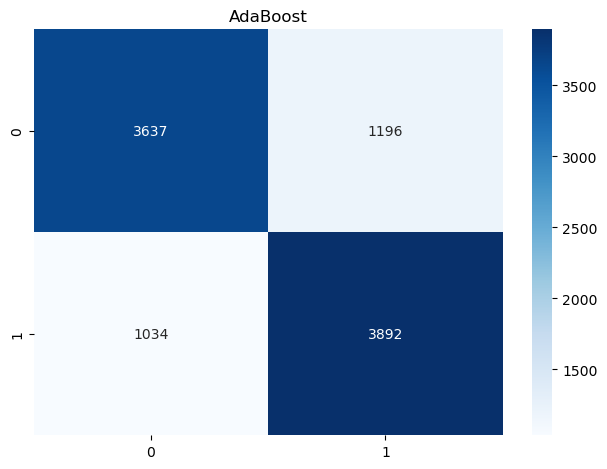

Training SVC...
SVC Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      4833
           1       0.81      0.80      0.80      4926

    accuracy                           0.80      9759
   macro avg       0.80      0.80      0.80      9759
weighted avg       0.80      0.80      0.80      9759



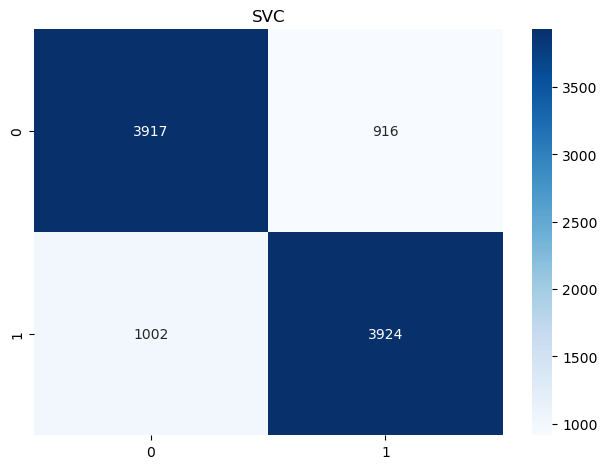

Training KNeighborsClassifier...
KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4833
           1       0.91      0.83      0.87      4926

    accuracy                           0.87      9759
   macro avg       0.87      0.87      0.87      9759
weighted avg       0.88      0.87      0.87      9759



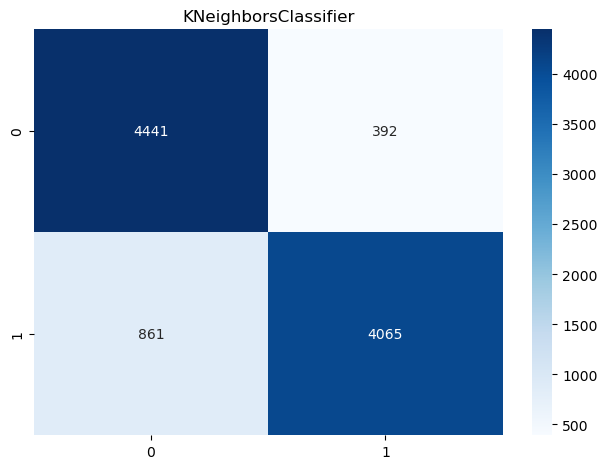

Training Decision Tree...
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4833
           1       0.89      0.89      0.89      4926

    accuracy                           0.89      9759
   macro avg       0.89      0.89      0.89      9759
weighted avg       0.89      0.89      0.89      9759



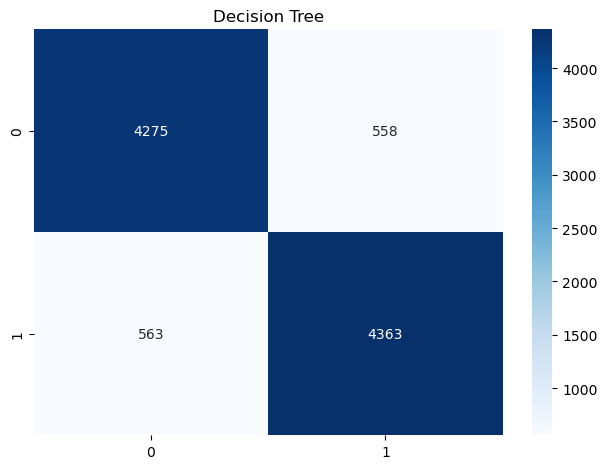

Training XGBoost...
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4833
           1       0.90      0.91      0.91      4926

    accuracy                           0.90      9759
   macro avg       0.90      0.90      0.90      9759
weighted avg       0.90      0.90      0.90      9759



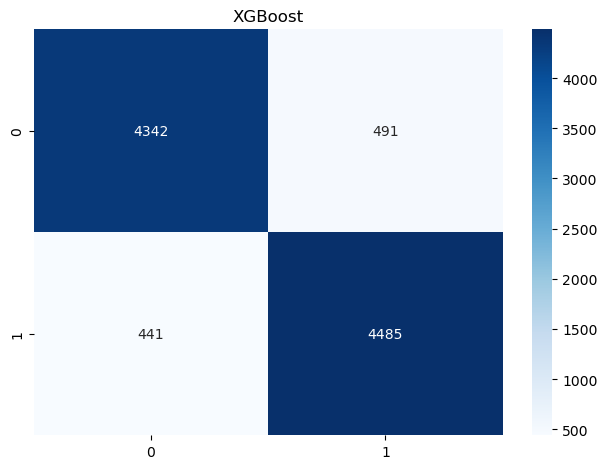

In [94]:
# Getting the visualizations and reports
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVC': SVC(class_weight='balanced', probability=True),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42)
}

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {
        'model': model,
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': matrix
    }
    
    print(f"{model_name} Classification Report:")
    print(report)
    sns.heatmap(matrix, annot=True, fmt="g", cmap="Blues")
    plt.title(f"{model_name}")
    plt.tight_layout()
    plt.show()

##### *INSIGHT: The RandomForestClassifier model appears to be best model since it has the higest accuracy and precision report. Therefore we tune the parameters to optimise it 

#### Hyperparameter Tuning 
* i.e using the GridSearchCV to optimise hyperparameters for the best performing model (i.e RandomForestClassifier Model)

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
Parameter_grid= { 'n_estimators': [50,100,200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2,5,10],
                 'min_samples_leaf': [1,2,3]
                }

grid_search=GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'),
                         param_grid=Parameter_grid,
                         scoring='f1',
                         cv=5,
                         n_jobs=-1
                        )



In [97]:
grid_search.fit(x_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [98]:
print(f"Best hyperparameters:{grid_search.best_params_}")

Best hyperparameters:{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [99]:
best_para_RF = grid_search.best_estimator_

In [100]:
y_pred_best_para_RF = best_para_RF.predict(x_test)

print("fine tuned Random Forest Classifier")
report = classification_report(y_test, y_pred_best_para_RF)

print(report)


fine tuned Random Forest Classifier
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4833
           1       0.92      0.92      0.92      4926

    accuracy                           0.92      9759
   macro avg       0.92      0.92      0.92      9759
weighted avg       0.92      0.92      0.92      9759



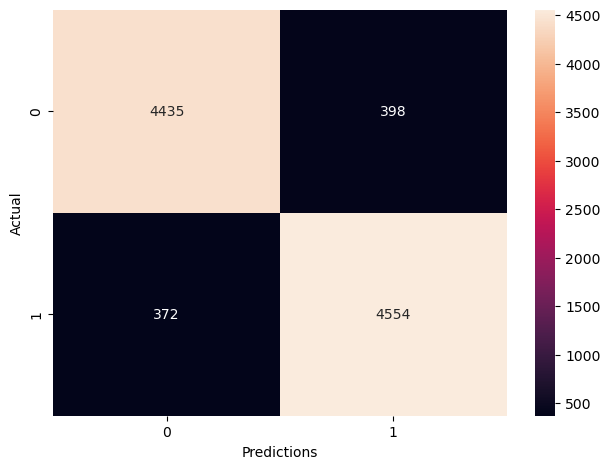

In [101]:
matrix = confusion_matrix(y_test, y_pred_best_para_RF)

sns.heatmap(matrix, annot=True, fmt='g')
plt.xlabel("Predictions")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

#### *Evaluating the model's ability to distinguish between classes

In [102]:
from sklearn.metrics import roc_curve, roc_auc_score

In [103]:
# Computing the probabilities
y_probs = best_para_RF.predict_proba(x_test)[:, 1]

#### Visualizing 

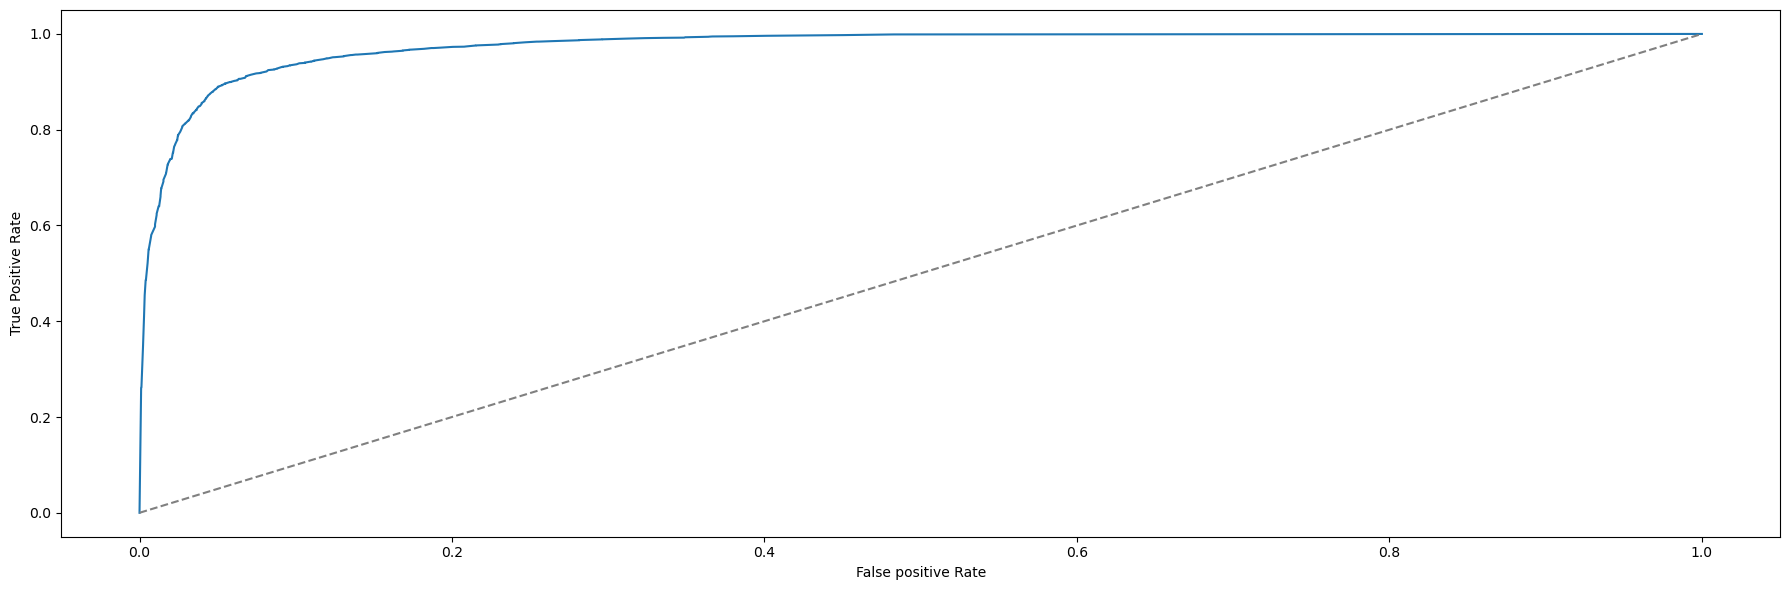

In [104]:
# ROC Curve

fpr, tpr, threshold = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(18,6))

plt.plot(fpr, tpr, label=f"AUC:{auc_score:0.2f}")
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel("False positive Rate")
plt.ylabel("True Positive Rate")

plt.tight_layout()
plt.show()

#### *INSIGHT: Since the curve is above the line, indicates that the model is able to differentiate the classes appropriately.

#### Investigating the most influencing factors to the booking behaviour of customers

In [163]:
importances = RGF_model.feature_importances_  

features = x_train.columns


In [172]:
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

print(feature_importance_df)


                     Feature  Importance
7                  lead time    0.328591
12             average price    0.169155
13          special requests    0.116392
15                     month    0.110602
8        market segment type    0.060608
16               day_of_week    0.053501
3      number of week nights    0.052220
2   number of weekend nights    0.032894
14                      year    0.026579
4               type of meal    0.018557
6                  room type    0.016604
5          car parking space    0.008493
9                   repeated    0.003353
11                   P-not-C    0.002051
10                       P-C    0.000399
0           number of adults    0.000000
1         number of children    0.000000


C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_17200\2152348087.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x="Importance", y="Feature", palette="cubehelix")


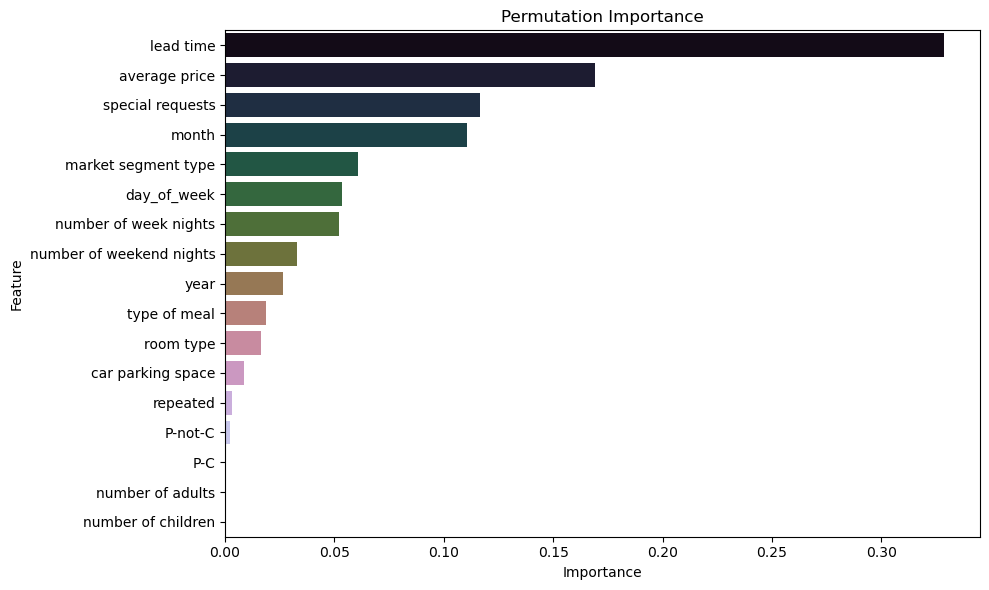

In [168]:
plt.figure(figsize=(10,6))

sns.barplot(data=feature_importance_df, x="Importance", y="Feature", palette="cubehelix")
plt.title("Permutation Importance")

plt.tight_layout()
plt.show();

#### *INSIGHT: This reveals that lead time i.e Time between the reservation and check-in date is the factor with the most influence on the booking status, followed by the average price. Hence the hotel could give more attention to policies on these factors 


In [194]:
import joblib

In [ ]:
joblib.dump(best_para_RF, "Predictor_model_for_booking_behaviour_for_hotel_Haven.pkl")


In [170]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.
